In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  # Matlab-style plotting
from IPython.display import display
import seaborn as sns

In [2]:
%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')
print('Packages for Mathematical Computation and visualization imported!')

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr
print('Statistical packages imported!')

Packages for Mathematical Computation and visualization imported!
Statistical packages imported!


In [3]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
print('Algorithm packages imported!')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

Algorithm packages imported!
Pipeline and preprocessing packages imported!
Model selection packages imported!


In [4]:
house = pd.read_csv('housing-job.csv')

In [5]:
house.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown",NaN,Dublin,"€ 343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,"€ 185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,"€ 438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,"€ 400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,"€ 160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [6]:
house.shape

(495631, 9)

In [7]:
house = house.drop_duplicates()

In [8]:
house = house.drop_duplicates(subset='Address', keep="first")

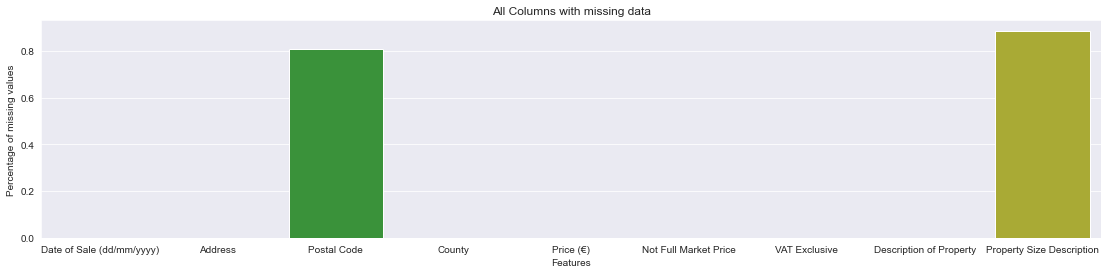

In [9]:
missing_value_counts = house.isnull().sum()
all_data_na = missing_value_counts / len(house)


#PLOTTING RATIO OF MISSING VALUES FOR EACH COLUMN
plt.subplots(figsize=(19, 4))
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')
plt.title('All Columns with missing data')
plt.show()

<AxesSubplot:>

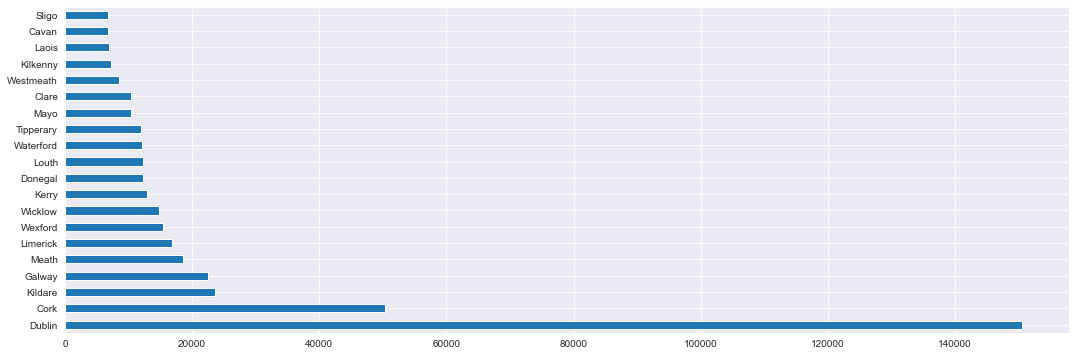

In [10]:
house['County'].value_counts()[:20].plot(kind='barh', figsize=(18,6))

In [11]:
house.dtypes

Date of Sale (dd/mm/yyyy)    object
Address                      object
Postal Code                  object
County                       object
Price (€)                    object
Not Full Market Price        object
VAT Exclusive                object
Description of Property      object
Property Size Description    object
dtype: object

In [12]:
house.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown",NaN,Dublin,"€ 343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,"€ 185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,"€ 438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,"€ 400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,"€ 160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [13]:
house['Description of Property'].value_counts()

Second-Hand Dwelling house /Apartment    379592
New Dwelling house /Apartment             79490
Teach/Árasán Cónaithe Atháimhe               29
Teach/Árasán Cónaithe Nua                     3
Teach/?ras?n C?naithe Nua                     1
Name: Description of Property, dtype: int64

In [14]:
house['Price (€)'] = house['Price (€)'].replace('[\€,]', '', regex=True).astype(float)

In [15]:
house.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [16]:
house['Postal Code'].value_counts()

Dublin 15               11080
Dublin 18                6363
Dublin 24                6212
Dublin 8                 5118
Dublin 9                 5038
Dublin 4                 4991
Dublin 7                 4828
Dublin 11                4768
Dublin 13                4516
Dublin 12                4370
Dublin 14                4198
Dublin 16                4047
Dublin 6                 3904
Dublin 3                 3881
Dublin 5                 3532
Dublin 1                 2876
Dublin 22                2632
Dublin 2                 1701
Dublin 10                1163
Dublin 20                1060
Dublin 17                1021
Dublin 6w                 761
Dublin 6W                   5
Ní Bhaineann                3
Baile Átha Cliath 3         2
Baile Átha Cliath 15        2
Baile Átha Cliath 18        2
Baile Átha Cliath 14        1
Baile ?tha Cliath 17        1
Baile Átha Cliath 5         1
Baile Átha Cliath 4         1
Baile Átha Cliath 9         1
Name: Postal Code, dtype: int64

In [17]:
house['Date of Sale (dd/mm/yyyy)'][0].split('/')

['01', '01', '2010']

In [18]:
dates = np.array(house['Date of Sale (dd/mm/yyyy)'])
year = []
for i in range(len(dates)):
    string = dates[i].split('/')
    year.append(string[2])

In [19]:
year = np.array(year)

In [20]:
house['Year'] = year.tolist()

In [21]:
house.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year
0,01/01/2010,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010
2,04/01/2010,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010


In [22]:
places = np.array(house['Address'])
town = []
for i in range(len(places)):
    string = places[i].split(',')
    word = string[-1].lower()
    #print(word)
    word = word.title()
    town.append(word.strip())

In [23]:
town = np.array(town)

In [24]:
house['Town/City'] = town.tolist()

In [25]:
house.head(15)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City
0,01/01/2010,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Churchtown
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010,Portlaoise
2,04/01/2010,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Dundrum
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Mornington
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Kilkenny
5,04/01/2010,"12 Sallymount Avenue, Ranelagh",NaN,Dublin,425000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Ranelagh
6,04/01/2010,"13 Oakleigh Wood, Dooradoyle, Limerick",NaN,Limerick,172500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Limerick
7,04/01/2010,"13 The Drive, Chapelstown Gate, Tullow Road, C...",NaN,Carlow,177500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Carlow
8,04/01/2010,"15 Carriglawn, Waterpark, Carrigaline",NaN,Cork,180000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Carrigaline
9,04/01/2010,"15a Moore Bay, Kilkee",NaN,Clare,126500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Kilkee


In [26]:
house['Town/City'].value_counts()

Dublin               17164
Cork                 15201
Galway                9657
Limerick              7938
Kildare               6044
                     ...  
Kenagh  Longford         1
Cappry                   1
Upper Mill Road          1
St.Margarets Road        1
Ballycarrigy             1
Name: Town/City, Length: 15500, dtype: int64

<AxesSubplot:>

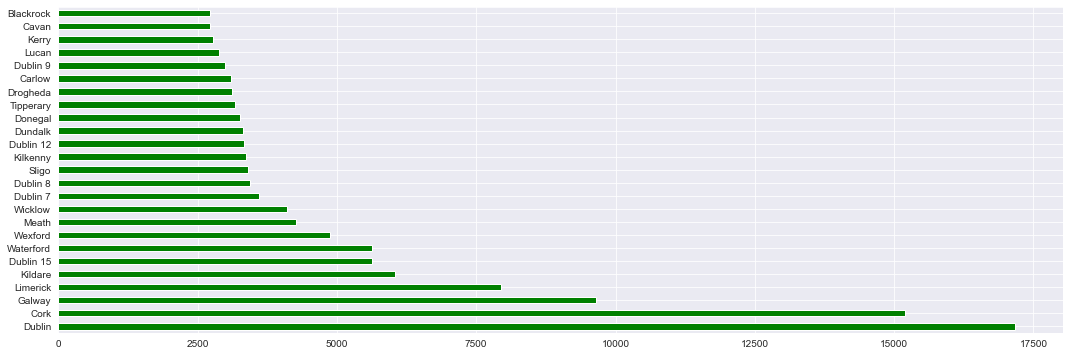

In [27]:
house['Town/City'].value_counts()[:25].plot(kind='barh', color='green', figsize=(18,6))

In [28]:
house['Postal Code'].value_counts()

Dublin 15               11080
Dublin 18                6363
Dublin 24                6212
Dublin 8                 5118
Dublin 9                 5038
Dublin 4                 4991
Dublin 7                 4828
Dublin 11                4768
Dublin 13                4516
Dublin 12                4370
Dublin 14                4198
Dublin 16                4047
Dublin 6                 3904
Dublin 3                 3881
Dublin 5                 3532
Dublin 1                 2876
Dublin 22                2632
Dublin 2                 1701
Dublin 10                1163
Dublin 20                1060
Dublin 17                1021
Dublin 6w                 761
Dublin 6W                   5
Ní Bhaineann                3
Baile Átha Cliath 3         2
Baile Átha Cliath 15        2
Baile Átha Cliath 18        2
Baile Átha Cliath 14        1
Baile ?tha Cliath 17        1
Baile Átha Cliath 5         1
Baile Átha Cliath 4         1
Baile Átha Cliath 9         1
Name: Postal Code, dtype: int64

In [29]:
dubs = []
i = 1
while i < 25:
    string = 'Dublin ' + str(i)
    dubs.append(string)
    i += 1

In [30]:
places = np.array(house['Address'])
post = []
for i in range(len(places)):
    string = places[i].split(',')
    word = string[-1].lower()
    word = word.title().strip()
    if word in dubs:
        post.append(word)
    else:
        post.append('')

In [31]:
house.replace({'Property Size Description':{'greater than 125 sq metres':'greater than or equal to 125 sq metres'}}, inplace = True)

In [32]:
#stock = pd.read_csv('stock-dub.csv', index_col='Unnamed: 0')

In [33]:
#stock

In [34]:
house.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City
0,01/01/2010,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Churchtown
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010,Portlaoise
2,04/01/2010,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Dundrum
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Mornington
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Kilkenny


In [35]:
house.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City
0,01/01/2010,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Churchtown
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010,Portlaoise
2,04/01/2010,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Dundrum
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Mornington
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,Kilkenny


In [36]:
house['Not Full Market Price'].value_counts()

No     436786
Yes     22329
Name: Not Full Market Price, dtype: int64

In [37]:
cleanup_nums = {"Not Full Market Price": {"Yes": 0, "No": 1}, "VAT Exclusive": {"Yes": 0, "No": 1}}

In [38]:
house = house.replace(cleanup_nums)
house.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City
0,01/01/2010,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,Second-Hand Dwelling house /Apartment,NaN,2010,Churchtown
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010,Portlaoise
2,04/01/2010,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,Second-Hand Dwelling house /Apartment,NaN,2010,Dundrum
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,Second-Hand Dwelling house /Apartment,NaN,2010,Mornington
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,Second-Hand Dwelling house /Apartment,NaN,2010,Kilkenny


In [39]:
house['Property Size Description'].value_counts()

greater than or equal to 38 sq metres and less than 125 sq metres                  37550
greater than or equal to 125 sq metres                                             11232
less than 38 sq metres                                                              3210
níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach        2
n?os l? n? 38 m?adar cearnach                                                          1
Name: Property Size Description, dtype: int64

In [40]:
house.replace({'Property Size Description':{'greater than 125 sq metres':'greater than or equal to 125 sq metres'}}, inplace = True)

In [41]:
house.replace({'Property Size Description':{'níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach':'greater than or equal to 38 sq metres and less than 125 sq metres'}}, inplace = True)

In [42]:
house.replace({'Property Size Description':{'n?os l? n? 38 m?adar cearnach':'less than 38 sq metres'}}, inplace = True)

In [43]:
cleanup_nums_prop = {"Property Size Description": {"less than 38 sq metres": 0, "greater than or equal to 38 sq metres and less than 125 sq metres": 1,
                                                  "greater than or equal to 125 sq metres": 2}}

In [44]:
house = house.replace(cleanup_nums_prop)
house.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City
0,01/01/2010,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,Second-Hand Dwelling house /Apartment,NaN,2010,Churchtown
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,New Dwelling house /Apartment,1.0,2010,Portlaoise
2,04/01/2010,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,Second-Hand Dwelling house /Apartment,NaN,2010,Dundrum
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,Second-Hand Dwelling house /Apartment,NaN,2010,Mornington
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,Second-Hand Dwelling house /Apartment,NaN,2010,Kilkenny


In [45]:
house['Property Size Description'] = house['Property Size Description'].astype('Int64')

In [46]:
house.dtypes

Date of Sale (dd/mm/yyyy)     object
Address                       object
Postal Code                   object
County                        object
Price (€)                    float64
Not Full Market Price          int64
VAT Exclusive                  int64
Description of Property       object
Property Size Description      Int64
Year                          object
Town/City                     object
dtype: object

In [47]:
house.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City
0,01/01/2010,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,Second-Hand Dwelling house /Apartment,<NA>,2010,Churchtown
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,New Dwelling house /Apartment,1,2010,Portlaoise
2,04/01/2010,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,Second-Hand Dwelling house /Apartment,<NA>,2010,Dundrum
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,Second-Hand Dwelling house /Apartment,<NA>,2010,Mornington
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,Second-Hand Dwelling house /Apartment,<NA>,2010,Kilkenny


In [48]:
dates = np.array(house['Date of Sale (dd/mm/yyyy)'])
month = []
for i in range(len(dates)):
    string = dates[i].split('/')
    month.append(string[1])

In [49]:
month = np.array(month)
house['Month'] = month.tolist()

In [50]:
house.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City,Month
0,01/01/2010,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,Second-Hand Dwelling house /Apartment,<NA>,2010,Churchtown,01
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,New Dwelling house /Apartment,1,2010,Portlaoise,01
2,04/01/2010,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,Second-Hand Dwelling house /Apartment,<NA>,2010,Dundrum,01
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,Second-Hand Dwelling house /Apartment,<NA>,2010,Mornington,01
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,Second-Hand Dwelling house /Apartment,<NA>,2010,Kilkenny,01


In [51]:
house.drop(columns=['Date of Sale (dd/mm/yyyy)'], inplace=True)

In [52]:
house.head()

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City,Month
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,Second-Hand Dwelling house /Apartment,<NA>,2010,Churchtown,01
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,New Dwelling house /Apartment,1,2010,Portlaoise,01
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,Second-Hand Dwelling house /Apartment,<NA>,2010,Dundrum,01
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,Second-Hand Dwelling house /Apartment,<NA>,2010,Mornington,01
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,Second-Hand Dwelling house /Apartment,<NA>,2010,Kilkenny,01


In [53]:
house.shape

(459115, 11)

In [54]:
house['Property Size Description']= house['Property Size Description'].interpolate(method='pad');

In [55]:
house

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City,Month
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,Second-Hand Dwelling house /Apartment,<NA>,2010,Churchtown,01
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,New Dwelling house /Apartment,1,2010,Portlaoise,01
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,Second-Hand Dwelling house /Apartment,1,2010,Dundrum,01
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,Second-Hand Dwelling house /Apartment,1,2010,Mornington,01
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,Second-Hand Dwelling house /Apartment,1,2010,Kilkenny,01
...,...,...,...,...,...,...,...,...,...,...,...
495624,"DRINAN, BALLYMAHON",NaN,Longford,175000.0,1,1,Second-Hand Dwelling house /Apartment,2,2021,Ballymahon,09
495627,"KILBEG, LADYSBRIDGE",NaN,Cork,210000.0,1,1,Second-Hand Dwelling house /Apartment,2,2021,Ladysbridge,09
495628,"LOWER MEADOWS, GLENSHESK, TEMPLEGLANTINE",NaN,Limerick,252500.0,1,1,Second-Hand Dwelling house /Apartment,2,2021,Templeglantine,09
495629,"NEWTOWN, BALLYCARRIGY",NaN,Westmeath,85000.0,1,1,Second-Hand Dwelling house /Apartment,2,2021,Ballycarrigy,09


In [56]:
house.at[0, 'Property Size Description'] = 0

In [57]:
house.head()

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City,Month
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,Second-Hand Dwelling house /Apartment,0,2010,Churchtown,01
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,New Dwelling house /Apartment,1,2010,Portlaoise,01
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,Second-Hand Dwelling house /Apartment,1,2010,Dundrum,01
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,Second-Hand Dwelling house /Apartment,1,2010,Mornington,01
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,Second-Hand Dwelling house /Apartment,1,2010,Kilkenny,01


In [58]:
house['Description of Property'].value_counts()

Second-Hand Dwelling house /Apartment    379592
New Dwelling house /Apartment             79490
Teach/Árasán Cónaithe Atháimhe               29
Teach/Árasán Cónaithe Nua                     3
Teach/?ras?n C?naithe Nua                     1
Name: Description of Property, dtype: int64

In [59]:
house.replace({'Description of Property':{'Teach/Árasán Cónaithe Atháimhe':'Second-Hand Dwelling house /Apartment'}}, inplace = True)

In [60]:
house.replace({'Description of Property':{'Teach/Árasán Cónaithe Nua':'New Dwelling house /Apartment'}}, inplace = True)

In [61]:
house.replace({'Description of Property':{'Teach/?ras?n C?naithe Nua':'New Dwelling house /Apartment'}}, inplace = True)

In [62]:
cleanup_nums_new = {"Description of Property": {"New Dwelling house /Apartment": 0, "Second-Hand Dwelling house /Apartment": 1,
                                                  }}

In [63]:
house = house.replace(cleanup_nums_new)
house.head()

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City,Month
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,Churchtown,01
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,Portlaoise,01
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,Dundrum,01
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,Mornington,01
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,Kilkenny,01


In [64]:
Q1 = house['Price (€)'].quantile(0.25)
Q3 = house['Price (€)'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

186000.0


In [65]:
house.head()

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City,Month
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,Churchtown,01
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,Portlaoise,01
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,Dundrum,01
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,Mornington,01
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,Kilkenny,01


In [66]:
house['Year'] = house['Year'].astype('int64')
house['Property Size Description'] = house['Property Size Description'].astype('object')
house['Month'] = house['Month'].astype('int64')

In [67]:
counties = np.array(house['County'])
county = []
for i in range(len(counties)):
    if counties[i] not in county:
        county.append(counties[i])

In [68]:
house

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City,Month
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,Churchtown,1
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,Portlaoise,1
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,Dundrum,1
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,Mornington,1
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,Kilkenny,1
...,...,...,...,...,...,...,...,...,...,...,...
495624,"DRINAN, BALLYMAHON",NaN,Longford,175000.0,1,1,1,2,2021,Ballymahon,9
495627,"KILBEG, LADYSBRIDGE",NaN,Cork,210000.0,1,1,1,2,2021,Ladysbridge,9
495628,"LOWER MEADOWS, GLENSHESK, TEMPLEGLANTINE",NaN,Limerick,252500.0,1,1,1,2,2021,Templeglantine,9
495629,"NEWTOWN, BALLYCARRIGY",NaN,Westmeath,85000.0,1,1,1,2,2021,Ballycarrigy,9


In [69]:
places = np.array(house['Address'])
towns = []
for i in range(len(places)):
    word = places[i]
    word = word.title()
    towns.append(word.strip())

In [70]:
towns = np.array(towns)
house['Address'] = towns.tolist()

In [71]:
house

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City,Month
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,Churchtown,1
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,Portlaoise,1
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,Dundrum,1
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,Mornington,1
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,Kilkenny,1
...,...,...,...,...,...,...,...,...,...,...,...
495624,"Drinan, Ballymahon",NaN,Longford,175000.0,1,1,1,2,2021,Ballymahon,9
495627,"Kilbeg, Ladysbridge",NaN,Cork,210000.0,1,1,1,2,2021,Ladysbridge,9
495628,"Lower Meadows, Glenshesk, Templeglantine",NaN,Limerick,252500.0,1,1,1,2,2021,Templeglantine,9
495629,"Newtown, Ballycarrigy",NaN,Westmeath,85000.0,1,1,1,2,2021,Ballycarrigy,9


In [72]:
dubs.append('Co.')

In [73]:
dubs.append('County')
dubs.append('Co')
dubs.append('Road')
dubs.append('road')

In [74]:
townz = np.array(house['Town/City'])
places = np.array(house['Address'])
update = []
for i in range(len(townz)):
    string = places[i].split(',')
    if townz[i] in dubs:
        update.append(string[-2])
    else:
        update.append(townz[i])

In [75]:
house[house['Price (€)'] > 1750000]

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City,Month
13,"23 Elton Park, Sandycove",NaN,Dublin,1800000.00,1,1,1,1,2010,Sandycove,1
384,"10 Herbert Road, Sandymount",Dublin 4,Dublin,2030000.00,1,1,1,1,2010,Sandymount,1
1017,"Woodburn, 31 Sydney Ave, Blackrock",NaN,Dublin,2600000.00,1,1,1,1,2010,Blackrock,1
1458,"Sorrentoville, Vico Road, Dalkey",NaN,Dublin,2400000.00,1,1,1,2,2010,Dalkey,2
1988,"30 Apts And One Commercial Unit, Sutton Court,...",NaN,Cork,4563876.65,1,0,0,1,2010,Mitchelstown,2
...,...,...,...,...,...,...,...,...,...,...,...
494964,"32 Elgin Rd Flat 1, Ballsbridge, Dublin 4",Dublin 4,Dublin,2750000.00,1,1,1,2,2021,Dublin 4,9
494966,"34 Elgin Rd Flat 1, Ballsbridge, Dubiln 4",Dublin 4,Dublin,2750000.00,1,1,1,2,2021,Dubiln 4,9
495023,"Blocks A And C And The Common Areas, Santry Pl...",Dublin 9,Dublin,57761218.00,1,0,0,2,2021,Swords Road,9
495063,"12 12A 13 13A 1 2 3 4 5 6, Cois Sruthan, Bally...",NaN,Dublin,2400000.00,1,0,0,2,2021,Ballyboughal,9


In [76]:
house = house.drop(house[house['Price (€)'] > 1750000].index)

In [77]:
house.head()

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Town/City,Month
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,Churchtown,1
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,Portlaoise,1
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,Dundrum,1
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,Mornington,1
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,Kilkenny,1


In [78]:
townz = np.array(house['Town/City'])
#places = np.array(house['Address'])
update = []
for i in range(len(townz)):
    update.append(townz[i].strip())

In [79]:
update = np.array(update)
house['Town/City/Area'] = update.tolist()

In [80]:
update

array(['Churchtown', 'Portlaoise', 'Dundrum', ..., 'Templeglantine',
       'Ballycarrigy', 'Athboy'], dtype='<U35')

In [81]:
house.drop(columns=['Town/City'], inplace=True)

In [82]:
house

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,1,Churchtown
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,1,Portlaoise
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,1,Dundrum
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,1,Mornington
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,1,Kilkenny
...,...,...,...,...,...,...,...,...,...,...,...
495624,"Drinan, Ballymahon",NaN,Longford,175000.0,1,1,1,2,2021,9,Ballymahon
495627,"Kilbeg, Ladysbridge",NaN,Cork,210000.0,1,1,1,2,2021,9,Ladysbridge
495628,"Lower Meadows, Glenshesk, Templeglantine",NaN,Limerick,252500.0,1,1,1,2,2021,9,Templeglantine
495629,"Newtown, Ballycarrigy",NaN,Westmeath,85000.0,1,1,1,2,2021,9,Ballycarrigy


### I am now going to remove some values from our dataset due to the town values
Any town denoted with road, rd, street or heights in it will be removed. This is due to these being the last value in an address as per our creation of the town column previously. As these are the last value it can be expected these rows are missing locational values such as the town or city they are in. 

In [83]:
txt = "road"
townz = np.array(house['Town/City/Area'])
#places = np.array(house['Address'])
rd = []
for i in range(len(townz)):
    if txt in townz[i][-4:]:
        rd.append(townz[i])

In [84]:
len(rd)

4

In [85]:
txt = "Road"
townz = np.array(house['Town/City/Area'])
#places = np.array(house['Address'])
rdz = []
for i in range(len(townz)):
    if txt in townz[i][-4:]:
        rdz.append(townz[i])

In [86]:
len(rdz)

8797

In [87]:
txt = "County"
townz = np.array(house['Town/City/Area'])
#places = np.array(house['Address'])
rdc = []
for i in range(len(townz)):
    if txt in townz[i][:6]:
        rdc.append(townz[i])

In [88]:
len(rdc)

7132

In [89]:
#rdc

In [90]:
txt = "Heights"
townz = np.array(house['Town/City/Area'])
#places = np.array(house['Address'])
rdh = []
for i in range(len(townz)):
    if txt in townz[i][-7:]:
        rdh.append(townz[i])

In [91]:
rdh

['Kingswood Heights',
 'Belgard Heights',
 'Leopardstown Heights',
 'Kingswood Heights',
 'Leopardstown Heights',
 'Leopardstown Heights',
 'Kingswood Heights',
 'Dundrum Heights',
 'Whiterock Heights',
 'Belgard Heights',
 'Raheen Heights',
 'Leopardstown Heights',
 'Caherdavin Heights',
 'Kingswood Heights',
 'Caherdavin Heights',
 'Castlebellingham Heights',
 'Kingswood Heights',
 'Raheen Heights',
 'Glenageary Heights',
 'Castlebellingham Heights',
 'Harbour Heights',
 'Castle Heights',
 'Knockboy Heights',
 'Glenageary Heights']

In [92]:
txt = "Street"
townz = np.array(house['Town/City/Area'])
#places = np.array(house['Address'])
rdl = []
for i in range(len(townz)):
    if txt in townz[i][-7:]:
        rdl.append(townz[i])

In [93]:
remove = rd + rdz + rdh + rdl
house = house[~house['Town/City/Area'].isin(remove)]

In [94]:
vals = list(set(post))

In [95]:
townz = np.array(house['Town/City/Area'])
#places = np.array(house['Address'])
drop = []
for i in range(len(townz)):
    if townz[i] in vals:
        drop.append(townz[i])

In [96]:
len(drop)

48437

In [97]:
house = house[~house['Town/City/Area'].isin(drop)]

In [98]:
house.shape

(398392, 11)

In [99]:
house['Property Size Description'] = house['Property Size Description'].astype('int64')

In [100]:
dt = []
i = 0
county = np.array(house['County'])
while i < len(county):
    if county[i] not in dt:
        dt.append(county[i])
        i += 1
    else:
        i += 1

In [101]:
geo = pd.read_csv('house-price-cleaned-2012-on.csv')
regions = {}
reg1 = np.array(geo['geo_county'])
reg2 = np.array(geo['region'])
for i in range(len(reg1)):
    if reg1[i] not in regions:
        regions[reg1[i]] = reg2[i]
    else:
        continue

In [102]:
border = ['Leitrim', 'Sligo', 'Monaghan', 'Louth', 'Cavan', 'Donegal']
west = ['Roscommon', 'Mayo', 'Galway']
midland = ['Offaly', 'Laois', 'Longford', 'Westmeath']
se = ['Carlow', 'Waterford', 'Kilkenny', 'Wexford', 'Tipperary']
me = ['Wicklow', 'Kildare', 'Meath']
sw = ['Cork', 'Kerry']
mw = ['Limerick', 'Clare']
regions_added = []
county = np.array(house['County'])
for i in range(len(county)):
    if county[i] in border:
        regions_added.append('Border')
    elif county[i] in west:
        regions_added.append('West')
    elif county[i] in midland:
        regions_added.append('Midlands')
    elif county[i] in se:
        regions_added.append('South East (IE)')
    elif county[i] in me:
        regions_added.append('Mid-East')
    elif county[i] in sw:
        regions_added.append('South-West (IE)')
    elif county[i] in mw:
        regions_added.append('Mid-West')
    else:
        regions_added.append('Dublin')

In [103]:
house['Region'] = regions_added

In [104]:
count = 0
add = np.array(house['Address'])
wrd = ['Apartment', 'apartment', 'flat', 'Flat', 'Apt']
ap = []
for i in range(len(add)):
    for j in range(len(wrd)):
        if wrd[j] in add[i]:
            count += 1
            ap.append(add[i])
        else:
            continue

In [105]:
lst = []
add = np.array(house['Address'])
for i in range(len(add)):
    if add[i] in ap:
        lst.append('Apartment')
    else:
        lst.append('Other')

In [106]:
house['Apartment'] = lst

In [107]:
cleanup_nums_new = {"Apartment": {"Other": 0, "Apartment": 1}}
house = house.replace(cleanup_nums_new)
house.head()

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,1,Churchtown,Dublin,0
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,1,Portlaoise,Midlands,0
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,1,Dundrum,Dublin,0
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,1,Mornington,Mid-East,0
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,1,Kilkenny,South East (IE),0


In [108]:
res = house

In [109]:
res

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,1,Churchtown,Dublin,0
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,1,Portlaoise,Midlands,0
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,1,Dundrum,Dublin,0
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,1,Mornington,Mid-East,0
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,1,Kilkenny,South East (IE),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495624,"Drinan, Ballymahon",NaN,Longford,175000.0,1,1,1,2,2021,9,Ballymahon,Midlands,0
495627,"Kilbeg, Ladysbridge",NaN,Cork,210000.0,1,1,1,2,2021,9,Ladysbridge,South-West (IE),0
495628,"Lower Meadows, Glenshesk, Templeglantine",NaN,Limerick,252500.0,1,1,1,2,2021,9,Templeglantine,Mid-West,0
495629,"Newtown, Ballycarrigy",NaN,Westmeath,85000.0,1,1,1,2,2021,9,Ballycarrigy,Midlands,0


In [110]:
commas1 = np.array(res['Address'])
new = []
for i in range(len(commas1)):
    str1 = commas1[i]
    res1 = " ".join(str1.split())
    new.append(res1)

In [111]:
res['Address'] = new

In [112]:
res

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,1,Churchtown,Dublin,0
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,1,Portlaoise,Midlands,0
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,1,Dundrum,Dublin,0
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,1,Mornington,Mid-East,0
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,1,Kilkenny,South East (IE),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495624,"Drinan, Ballymahon",NaN,Longford,175000.0,1,1,1,2,2021,9,Ballymahon,Midlands,0
495627,"Kilbeg, Ladysbridge",NaN,Cork,210000.0,1,1,1,2,2021,9,Ladysbridge,South-West (IE),0
495628,"Lower Meadows, Glenshesk, Templeglantine",NaN,Limerick,252500.0,1,1,1,2,2021,9,Templeglantine,Mid-West,0
495629,"Newtown, Ballycarrigy",NaN,Westmeath,85000.0,1,1,1,2,2021,9,Ballycarrigy,Midlands,0


In [113]:
res = res.drop_duplicates(subset=['Address', 'Price (€)'], keep="first")

In [114]:
res

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,1,Churchtown,Dublin,0
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,1,Portlaoise,Midlands,0
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,1,Dundrum,Dublin,0
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,1,Mornington,Mid-East,0
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,1,Kilkenny,South East (IE),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495624,"Drinan, Ballymahon",NaN,Longford,175000.0,1,1,1,2,2021,9,Ballymahon,Midlands,0
495627,"Kilbeg, Ladysbridge",NaN,Cork,210000.0,1,1,1,2,2021,9,Ladysbridge,South-West (IE),0
495628,"Lower Meadows, Glenshesk, Templeglantine",NaN,Limerick,252500.0,1,1,1,2,2021,9,Templeglantine,Mid-West,0
495629,"Newtown, Ballycarrigy",NaN,Westmeath,85000.0,1,1,1,2,2021,9,Ballycarrigy,Midlands,0


In [115]:
res['Apartment'] = house['Apartment']

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2223080311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['Apartment'] = house['Apartment']


In [116]:
res['Region'].value_counts()

Dublin             94979
South-West (IE)    61971
Mid-East           55828
South East (IE)    50694
Border             45256
West               38668
Mid-West           26471
Midlands           24439
Name: Region, dtype: int64

In [117]:
res.head()

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,1,Churchtown,Dublin,0
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,1,Portlaoise,Midlands,0
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,1,Dundrum,Dublin,0
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,1,Mornington,Mid-East,0
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,1,Kilkenny,South East (IE),0


In [118]:
house['Apartment'].value_counts()

0    375961
1     22431
Name: Apartment, dtype: int64

In [119]:
res.shape

(398306, 13)

In [120]:
res = res.drop_duplicates(subset='Address', keep="first")

In [121]:
res

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,1,Churchtown,Dublin,0
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,1,Portlaoise,Midlands,0
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,1,Dundrum,Dublin,0
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,1,Mornington,Mid-East,0
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,1,Kilkenny,South East (IE),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495622,"Ardkyle, Drumline, Newmarket On Fergus",NaN,Clare,355000.0,1,1,1,2,2021,9,Newmarket On Fergus,Mid-West,0
495627,"Kilbeg, Ladysbridge",NaN,Cork,210000.0,1,1,1,2,2021,9,Ladysbridge,South-West (IE),0
495628,"Lower Meadows, Glenshesk, Templeglantine",NaN,Limerick,252500.0,1,1,1,2,2021,9,Templeglantine,Mid-West,0
495629,"Newtown, Ballycarrigy",NaN,Westmeath,85000.0,1,1,1,2,2021,9,Ballycarrigy,Midlands,0


In [122]:
res[res['Town/City/Area'] == 'Phibsboro']

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
354,"9 Royal Canal, Bank Court, Phibsboro",Dublin 1,Dublin,275000.0,1,1,1,1,2010,1,Phibsboro,Dublin,0
709,"20A Auburn Street, Phibsboro",Dublin 7,Dublin,190000.0,1,1,1,1,2010,1,Phibsboro,Dublin,0
1395,"4 Connaught Street, Phibsboro",Dublin 7,Dublin,392000.0,1,1,1,1,2010,2,Phibsboro,Dublin,0
3433,"27 Norfolk Road, Phibsboro",Dublin 7,Dublin,300000.0,1,1,1,0,2010,3,Phibsboro,Dublin,0
4146,"8 Avondale Road, Phibsboro",Dublin 7,Dublin,216500.0,1,1,1,2,2010,3,Phibsboro,Dublin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394469,"Unit 1, 41 Connaught St, Phibsboro",Dublin 7,Dublin,535000.0,1,1,1,1,2019,10,Phibsboro,Dublin,0
439057,"36 Goldsmith Street, Phibsboro",Dublin 7,Dublin,523500.0,1,1,1,1,2020,9,Phibsboro,Dublin,0
471211,"Apt 1, 12 St Peters Rd, Phibsboro",Dublin 7,Dublin,202500.0,1,1,1,2,2021,4,Phibsboro,Dublin,1
471212,"Apt 2, 12 St Peters Rd, Phibsboro",NaN,Donegal,202500.0,1,1,1,2,2021,4,Phibsboro,Border,1


In [123]:
res[res['Town/City/Area'] == 'Phibsborough']

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
710,"20A, Auburn Street, Phibsborough",Dublin 7,Dublin,190000.0,1,1,1,1,2010,1,Phibsborough,Dublin,0
840,"16 Enniskerry Rd, Phibsborough",Dublin 7,Dublin,190000.0,1,1,1,1,2010,1,Phibsborough,Dublin,0
921,"46 Norfolk Road, Phibsborough",Dublin 7,Dublin,348000.0,1,1,1,2,2010,1,Phibsborough,Dublin,0
1088,"64, Glengarriff Parade, North Circular Road, P...",Dublin 7,Dublin,41000.0,0,1,1,1,2010,1,Phibsborough,Dublin,0
1694,"15 Charleville Road, Phibsborough",Dublin 7,Dublin,560000.0,1,1,1,1,2010,2,Phibsborough,Dublin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412414,"1 Bective Sq, Phibsborough Rd, Phibsborough",Dublin 7,Dublin,245000.0,1,1,1,1,2020,2,Phibsborough,Dublin,0
431241,"8 Bective Sq, Phibsborough Rd, Phibsborough",Dublin 7,Dublin,220000.0,1,1,1,2,2020,7,Phibsborough,Dublin,0
441274,"Flat 1, 14 St Ignatius Ave, Phibsborough",Dublin 7,Dublin,360000.0,1,1,1,1,2020,10,Phibsborough,Dublin,1
473929,"12 Dakota Court, Royal Canal Bank, Phibsborough",NaN,Dublin,228000.0,1,1,1,1,2021,4,Phibsborough,Dublin,0


In [124]:
res['Town/City/Area'].loc[(res['Town/City/Area'] == 'Phibsboro')] = 'Phibsborough'

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [125]:
res[res['Town/City/Area'] == 'Clarehall']

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
571,"10 Elmfield Lawn, Clarehall",Dublin 13,Dublin,337200.00,1,1,1,2,2010,1,Clarehall,Dublin,0
1947,"8 Elmfield Lawn, Clarehall",Dublin 13,Dublin,302500.00,1,1,1,1,2010,2,Clarehall,Dublin,0
2125,"Apt. 50 Block A, Kilkee House, Claire Village,...",NaN,Dublin,129950.00,1,1,1,1,2010,2,Clarehall,Dublin,1
3721,"7 Elmfield Close, Clarehall",Dublin 13,Dublin,330000.00,1,1,1,0,2010,3,Clarehall,Dublin,0
10517,"22 Templeview Close, Clarehall",NaN,Dublin,310000.00,1,1,1,1,2010,7,Clarehall,Dublin,0
15800,"53 Elmfield Way, Clarehall",Dublin 13,Dublin,275000.00,1,1,1,1,2010,10,Clarehall,Dublin,0
17434,"10 Doolin House, Clare Village, Clarehall",Dublin 13,Dublin,149735.68,1,0,0,1,2010,11,Clarehall,Dublin,0
20664,"1 Elmfield Crescent, Clarehall",NaN,Dublin,247500.00,1,1,1,1,2010,12,Clarehall,Dublin,0
27950,"59 Elmfield Way, Clarehall",NaN,Dublin,252000.00,1,1,1,1,2011,6,Clarehall,Dublin,0
27994,"37 Block E3 Ennis House, Clare Village, Clarehall",NaN,Dublin,114493.00,1,0,0,0,2011,6,Clarehall,Dublin,0


In [126]:
res[res['Town/City/Area'] == 'Clare Hall']

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
270,"5 Temple View Park, Clare Hall",Dublin 13,Dublin,290000.00,1,1,1,1,2010,1,Clare Hall,Dublin,0
1386,"3 Doolin House, Clare Village, Clare Hall",Dublin 17,Dublin,114499.39,1,0,0,1,2010,2,Clare Hall,Dublin,0
1809,"17 Block C Doonbeg House, Clare Village, Clare...",Dublin 17,Dublin,167356.82,1,0,0,1,2010,2,Clare Hall,Dublin,0
1948,"Apartment 40 Block B, Corofin House Clare Vill...",NaN,Dublin,147006.75,1,0,0,1,2010,2,Clare Hall,Dublin,1
1992,"38 Block D Doolin House, Clare Village, Clare ...",Dublin 17,Dublin,158546.00,1,0,0,1,2010,2,Clare Hall,Dublin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145785,"Apt 53 Block A, Clare Village, Clare Hall",NaN,Dublin,80000.00,1,1,1,1,2015,3,Clare Hall,Dublin,1
183386,"4 Templeview Close, Off Malahide Road, Clare Hall",Dublin 13,Dublin,245000.00,1,1,1,1,2015,12,Clare Hall,Dublin,0
255613,"Apt 42 Block E2 Quality House, Clarevillage, C...",Dublin 17,Dublin,165000.00,1,1,1,1,2017,5,Clare Hall,Dublin,1
314914,"36 Elmfield Walk, Malahide Road, Clare Hall",Dublin 13,Dublin,362000.00,1,1,1,1,2018,6,Clare Hall,Dublin,0


In [127]:
res['Town/City/Area'].loc[(res['Town/City/Area'] == 'Clarehall')] = 'Clare Hall'

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [128]:
res[res['Town/City/Area'] == 'Harolds Cross']

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
809,"45 Harolds Cross Cottages, Harolds Cross",Dublin 6w,Dublin,266000.0,1,1,1,1,2010,1,Harolds Cross,Dublin,0
961,"12 Clareville Road, Harolds Cross",Dublin 6W,Dublin,710000.0,1,1,1,1,2010,1,Harolds Cross,Dublin,0
965,"16 Larkfield Park, Harolds Cross",Dublin 6W,Dublin,325000.0,1,1,1,1,2010,1,Harolds Cross,Dublin,0
1283,"11 Fitzgerald Street, Harolds Cross",Dublin 6w,Dublin,323000.0,1,1,1,2,2010,2,Harolds Cross,Dublin,0
2253,"8 Mount Argus Green, Harolds Cross",Dublin 6w,Dublin,346000.0,1,1,1,1,2010,2,Harolds Cross,Dublin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
461106,"Mews, Rear Of 44 Parnell Rd, Harolds Cross",NaN,Dublin,180000.0,1,1,1,2,2021,1,Harolds Cross,Dublin,0
470729,"15 St Pancras House, Mount Talllant Avenue, Ha...",Dublin 6w,Dublin,458150.0,1,0,0,2,2021,4,Harolds Cross,Dublin,0
470962,"Unit 1, 56 Kenilworth Park, Harolds Cross",NaN,Dublin,925000.0,1,1,1,2,2021,4,Harolds Cross,Dublin,0
490096,"Apt 20 Parkview, 113 Harolds Cross Rd, Harolds...",NaN,Dublin,217000.0,1,1,1,2,2021,8,Harolds Cross,Dublin,1


In [129]:
res[res['Town/City/Area'] == "Harold'S Cross"]

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
292,"17 Swarnward Court, Parnell Road, Harold'S Cross",Dublin 12,Dublin,345000.0,1,1,1,2,2010,1,Harold'S Cross,Dublin,0
1360,"116 Harolds Cross Cottages, Harold'S Cross",Dublin 6,Dublin,230000.0,1,1,1,1,2010,2,Harold'S Cross,Dublin,0
1741,"50 Lower Kimmage Road, Harold'S Cross",Dublin 6w,Dublin,410000.0,1,1,1,1,2010,2,Harold'S Cross,Dublin,0
8560,"39 Parnell Road, Harold'S Cross",Dublin 6,Dublin,360000.0,1,1,1,0,2010,6,Harold'S Cross,Dublin,0
9709,"55 Harold'S Cross Cottages, Harold'S Cross",Dublin 6,Dublin,210000.0,1,1,1,2,2010,7,Harold'S Cross,Dublin,0
12343,"7 Church Park Drive, Harold'S Cross",Dublin 6w,Dublin,311000.0,1,1,1,1,2010,8,Harold'S Cross,Dublin,0
12797,"29 St. Lawrence'S Court, Harold'S Cross",Dublin 6,Dublin,245000.0,1,1,1,2,2010,8,Harold'S Cross,Dublin,0
14934,"45 Priory Raod, Harold'S Cross",NaN,Dublin,335000.0,1,1,1,1,2010,9,Harold'S Cross,Dublin,0
17454,"16 Greenmount Lane, Harold'S Cross",Dublin 6,Dublin,170000.0,1,1,1,2,2010,11,Harold'S Cross,Dublin,0
22985,"1 Church Park Court, Mount Argus Road, Harold'...",Dublin 6w,Dublin,250000.0,1,1,1,1,2011,2,Harold'S Cross,Dublin,0


In [130]:
res['Town/City/Area'].loc[(res['Town/City/Area'] == "Harold'S Cross")] = 'Harolds Cross'

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [131]:
res[res['Town/City/Area'] == "Turners Cross"]

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
2172,"27 Doyle Road, Turners Cross",NaN,Cork,225000.0,1,1,1,1,2010,2,Turners Cross,South-West (IE),0
3291,"15 Capwell Road, Turners Cross",NaN,Cork,160000.0,0,1,1,1,2010,3,Turners Cross,South-West (IE),0
4618,"14 St Josephs, Derrynane Road, Turners Cross",NaN,Cork,193000.0,1,1,1,1,2010,4,Turners Cross,South-West (IE),0
5988,"10 St Annes Park, Derrynane Road, Turners Cross",NaN,Cork,193000.0,1,1,1,0,2010,5,Turners Cross,South-West (IE),0
6695,"59 Father Matthew Road, Turners Cross",NaN,Cork,163000.0,1,1,1,1,2010,5,Turners Cross,South-West (IE),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432068,"16 Elm Grove Terrace, Evergreen Rd, Turners Cross",NaN,Cork,220000.0,1,1,1,2,2020,7,Turners Cross,South-West (IE),0
434648,"Cedarhurst, Upper Doyle Rd, Turners Cross",NaN,Cork,208333.0,0,1,1,1,2020,8,Turners Cross,South-West (IE),0
450162,"Maryville, Upper Friars Rd, Turners Cross",NaN,Cork,246000.0,1,1,1,2,2020,11,Turners Cross,South-West (IE),0
469992,"Shalom, 34 Oconnell Ave, Turners Cross",NaN,Cork,261000.0,1,1,1,2,2021,3,Turners Cross,South-West (IE),0


In [132]:
res[res['Town/City/Area'] == "Turner'S Cross"]

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
41440,"2 Hollyville, Curragh Road, Turner'S Cross",NaN,Cork,55000.0,1,1,1,1,2012,2,Turner'S Cross,South-West (IE),0
61648,"2 St. Anne'S Park, Turner'S Cross",NaN,Cork,89000.0,1,1,1,1,2012,12,Turner'S Cross,South-West (IE),0
65417,"9 Congress Rd., Turner'S Cross",NaN,Cork,135000.0,1,1,1,1,2013,1,Turner'S Cross,South-West (IE),0
70998,"'St. Francis', Green Lawn Curragh Road, Turner...",NaN,Cork,212000.0,1,1,1,2,2013,4,Turner'S Cross,South-West (IE),0
84292,"Aughaville, St. Patrick'S Road, Turner'S Cross",NaN,Cork,170000.0,1,1,1,0,2013,10,Turner'S Cross,South-West (IE),0
252782,"Breeogue House, Curragh Road, Turner'S Cross",NaN,Cork,247500.0,1,1,1,1,2017,5,Turner'S Cross,South-West (IE),0


In [133]:
res['Town/City/Area'].loc[(res['Town/City/Area'] == "Turner'S Cross")] = 'Cork City'

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [134]:
res['Town/City/Area'].loc[(res['Town/City/Area'] == "Turners Cross")] = 'Cork City'

In [135]:
towns = np.array(res['Town/City/Area'])
duplicate = []
areas = []
for i in range(len(towns)):
    if towns[i] not in areas:
        areas.append(towns[i])
    else:
        duplicate.append(towns[i])

In [136]:
len(areas)

13966

# More accurate towns
Next, I am going to try to make the towns denoted more accurate that previously. I will do this be developing a function to detect towns. Earlier we just took the last part of an address as our town/area but there are many inaccuraries there. Some addresses denote the town they are in in the last part (after final comma) of the string but a lot of addresses in Ireland denote the county in the last part (Co. Roscommon, Roscommon, Co Roscommon). We are now going to look into this in more detail, we will take the list of towns of villages associated with each county from wikipedia and use these to find where these values are contained in the addresses (most likely the second to last string).

### Cork

In [137]:
df1 = res[res['Town/City/Area'] == "Cork"]

In [138]:
df1.head(1)

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
14,"25 Lavallin Drive, Whitechurch, Cork",NaN,Cork,352000.0,1,0,0,2,2010,1,Cork,South-West (IE),0


In [139]:
cork_towns = ['Adrigole', 'Aghabullogue', 'Aghada', 'Ahakista','Aherla', 'Ahiohill', 'Allihies',
'Ardfield', 'Ardgroom', 'Ballinacurra', 'Ballinadee', 'Ballinagree', 'Ballinascarty', 'Ballincollig',
'Ballindangan', 'Ballineen', 'Ballingeary', 'Ballinhassig', 'Ballinora', 'Ballinspittle', 'Ballintemple',
'Ballymacoda', 'Ballyclogh','Ballydehob', 'Ballydesmond', 'Ballygarvan', 'Ballylickey', 'Ballymakeera',
'Ballyvourney', 'Ballymore', 'Baltimore', 'Bandon', 'Banteer', 'Bantry', 'Béal na Bláth', 'Belgooly',
'Belvelly', 'Bishopstown', 'Blarney', 'Boherbue', 'Buttevant', 'Bweeng', 'Canovee', 'Cape Clear',
'Carrigadrohid', 'Carrigaline', 'Carriganimmy', 'Carrigtwohill', 'Castlehaven', 'Castlelyons',
'Castlemartyr', 'Castletownbere', 'Castletownroche', 'Castletownshend', 'Castletown-Kinneigh',
'Charleville', 'Churchtown', 'Cloghroe', 'Clonakilty', 'Clondulane', 'Cloughduv', 'Cloyne', 'Coachford',
'Cobh', 'Conna', 'Coolea', 'Cork', 'Cork City', 'Courtmacsherry', 'Crookhaven', 'Crookstown', 'Crossbarry', 'Crosshaven',
'Cullen', 'Derry', 'Doneraile', 'Donoughmore', 'Douglas', 'Drimoleague', 'Drinagh', 'Dripsey', 'Dromahane',
'Dunderrow', 'Duneen', 'Dungourney', 'Dunmanus', 'Dunmanway', 'Durrus', 'Enniskean', 'Eyeries', 'Farran',
'Fermoy', 'Fota Island', 'Fountainstown', 'Glandore', 'Glanmire', 'Glanworth', 'Glasheen', 'Glenbrook',
'Glengarriff', 'Glounthaune', 'Goleen', 'Gougane Barra', 'Halfway', 'Innishannon', 'Kanturk', 'Kealkill',
'Kilbrittain', 'Kilcrohane', 'Kilmichael', 'Kilnamartyra', 'Kilumney', 'Kilworth', 'Kinsale', 'Knockavilla',
'Knocknagree', 'Knockraha', 'Killeagh', 'Ladysbridge', 'Laragh', 'Leap', 'Letter East', 'Letter West', 'Little Island',
'Liscarroll', 'Lisgoold', 'Lismire', 'Lombardstown', 'Lowertown', 'Lyre', 'Macroom', 'Maine South', 'Mallow', 'Mayfield',
'Meelin', 'Midleton', 'Milford', 'Millstreet', 'Minane Bridge', 'Mitchelstown', 'Monkstown', 'Montenotte', 'Mourneabbey',
'Nad', 'Newcestown', 'Newmarket', 'Newtownshandrum', 'Nohoval', 'Ovens', 'Rathcormac', 'Rhea', 'Riverstick', 'Rockchapel',
'Rosscarbery', 'Ringaskiddy', 'Sallybrook', 'Schull', 'Shanagarry', 'Shanbally', 'Shanballymore', "Sheep's Head", 'Sherkin',
'Skibbereen', 'Timoleague', 'Togher', 'Toureen', 'Tower', 'Union Hall', 'Upton', 'Waterfall', 'Watergrasshill', 'Whiddy',
'Whitegate', 'Whitechurch', 'Youghal']

In [140]:
def town_update(df, city, list_towns):
    crk = np.array(df['Address'])
    crk_area = np.array(df['Town/City/Area'])
    lst1 = []
    for i in range(len(crk)):
        add = crk[i].split(',')
        prev = add[-2].strip()
        wrd = add[-1].strip()
        #print(prev)
        #print(wrd)
        if prev in list_towns or prev.title().strip() in list_towns:
            lst1.append(prev)
        elif wrd in list_towns or wrd.title().strip() in list_towns:
            lst1.append(wrd)
        else:
            lst1.append(city)
    return lst1

In [141]:
crk1 = town_update(df1, 'Cork County', cork_towns)
df1['Town'] = crk1
df1.drop(columns=['Town/City/Area'], inplace=True)
df1

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1485303106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Town'] = crk1
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
14,"25 Lavallin Drive, Whitechurch, Cork",NaN,Cork,352000.00,1,0,0,2,2010,1,South-West (IE),0,Whitechurch
26,"78 Sundays Well Road, Cork",NaN,Cork,510000.00,1,1,1,2,2010,1,South-West (IE),0,Cork
41,"The Greenway, Mofel Farm Road, Cork",NaN,Cork,160000.00,0,1,1,1,2010,1,South-West (IE),0,Cork
75,"11 Glasheen Park, Magazine Road, Cork",NaN,Cork,265000.00,1,1,1,1,2010,1,South-West (IE),0,Cork
86,"547 The Heron, Jacobs Island, Cork",NaN,Cork,200000.00,1,1,1,1,2010,1,South-West (IE),0,Cork
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495431,"1 Rock Villas, Blarney St, Cork",NaN,Cork,141000.00,1,1,1,2,2021,9,South-West (IE),0,Cork
495468,"32 Patrick St, Fermoy, Cork",NaN,Cork,40000.00,1,1,1,2,2021,9,South-West (IE),0,Fermoy
495487,"6 Park Rd, Clonakilty, Cork",NaN,Cork,100000.00,1,1,1,2,2021,9,South-West (IE),0,Clonakilty
495556,"5 Old Friary Place, Shandon St, Cork",NaN,Cork,320000.00,1,1,1,2,2021,9,South-West (IE),0,Cork


In [142]:
df53 = res[res['Town/City/Area'] == "Co Cork"]
crk = town_update(df53, 'Cork County', cork_towns)
df53['Town'] = crk
df53.drop(columns=['Town/City/Area'], inplace=True)
df53

C:\Users\user\AppData\Local\Temp/ipykernel_18964/4184453761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df53['Town'] = crk
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
3439,"31 Clonmore, Mallow, Co Cork",NaN,Cork,265000.00,1,0,0,1,2010,3,South-West (IE),0,Mallow
3669,"Parochial House, Inniscarra, Co Cork",NaN,Cork,833000.00,1,1,1,2,2010,3,South-West (IE),0,Cork County
3799,"32 Mitchells Court, Kerry Pike, Co Cork",NaN,Cork,440528.00,1,0,0,2,2010,3,South-West (IE),0,Cork County
4622,"22 Glincool Gardens, Maglin, Co Cork",NaN,Cork,242500.00,1,1,1,1,2010,4,South-West (IE),0,Cork County
5029,"Cullomane West, Bantry, Co Cork",NaN,Cork,187500.00,1,1,1,1,2010,4,South-West (IE),0,Bantry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493286,"Ballymore, Cobh, Co Cork",NaN,Cork,235000.00,1,1,1,2,2021,9,South-West (IE),0,Cobh
493749,"Gurteen, Inniscarra, Co Cork",NaN,Cork,175000.00,1,1,1,2,2021,9,South-West (IE),0,Cork County
493918,"Gortlouchra, Ballingeary, Co Cork",NaN,Cork,6000.00,0,1,1,2,2021,9,South-West (IE),0,Ballingeary
493939,"10 Springmount Crescent, Kinsale, Co Cork",NaN,Cork,277533.03,1,0,0,2,2021,9,South-West (IE),0,Kinsale


In [143]:
df54 = res[res['Town/City/Area'] == "Co. Cork"]
crk = town_update(df54, 'Cork County', cork_towns)
df54['Town'] = crk
df54.drop(columns=['Town/City/Area'], inplace=True)
df54

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2678557943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df54['Town'] = crk
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
2882,"12 Tim Dalys Terrace, Midleton, Co. Cork",NaN,Cork,160000.0,1,1,1,1,2010,3,South-West (IE),0,Midleton
3050,"14 Ard Na Ri, Castlelyons, Co. Cork",NaN,Cork,307855.0,1,0,0,2,2010,3,South-West (IE),0,Castlelyons
3208,"Killaneetig, Ballinadee, Co. Cork",NaN,Cork,370000.0,1,1,1,2,2010,3,South-West (IE),0,Ballinadee
3259,"Broghill North, Charleville, Co. Cork",NaN,Cork,50000.0,1,1,1,1,2010,3,South-West (IE),0,Charleville
3389,"Britway, Castlelyons, Co. Cork",NaN,Cork,60000.0,1,1,1,1,2010,3,South-West (IE),0,Castlelyons
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489560,"176 Drakes Point, Crosshaven, Co. Cork",NaN,Cork,222471.5,1,0,0,2,2021,8,South-West (IE),0,Crosshaven
491358,"Walshtown Beg, Midleton, Co. Cork",NaN,Cork,350000.0,1,1,1,2,2021,8,South-West (IE),0,Midleton
493603,"25 Tawnies Crescent, Clonakilty, Co. Cork",NaN,Cork,212500.0,1,1,1,2,2021,9,South-West (IE),0,Clonakilty
494159,"61 North Main Street, Youghal, Co. Cork",NaN,Cork,70000.0,1,1,1,2,2021,9,South-West (IE),0,Youghal


In [144]:
df80 = res[res['Town/City/Area'] == "County Cork"]
crk = town_update(df80, 'Cork County', cork_towns)
df80['Town'] = crk
df80.drop(columns=['Town/City/Area'], inplace=True)
df80

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3012315092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df80['Town'] = crk
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
4396,"Ballinoe, Whites Cross, County Cork",NaN,Cork,265000.00,1,1,1,1,2010,4,South-West (IE),0,Cork County
11058,"Clontead More, Coachford, County Cork",NaN,Cork,175000.00,1,1,1,0,2010,7,South-West (IE),0,Coachford
17160,"No.7 An Caislean Close, Ballincollig, County Cork",NaN,Cork,170000.00,1,1,1,1,2010,10,South-West (IE),0,Ballincollig
19861,"54 Shanowen, Rathcormac, County Cork",NaN,Cork,120704.84,1,0,0,1,2010,12,South-West (IE),0,Rathcormac
25175,"Ballinluska, Myrtleville, County Cork",NaN,Cork,307500.00,1,1,1,1,2011,4,South-West (IE),0,Cork County
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493489,"Dunmahon, Glanworth, County Cork",NaN,Cork,40000.00,1,1,1,2,2021,9,South-West (IE),0,Glanworth
494003,"41 The Orchard, Watergrasshill, County Cork",NaN,Cork,263876.65,1,0,0,2,2021,9,South-West (IE),0,Watergrasshill
494389,"Sleveen Heights, Macroom, County Cork",NaN,Cork,356000.00,1,1,1,2,2021,9,South-West (IE),0,Macroom
495046,"Toorard, Freemount, County Cork",NaN,Cork,186000.00,1,1,1,2,2021,9,South-West (IE),0,Cork County


### Waterford

In [145]:
df2 = res[res['Town/City/Area'] == "Waterford"]

In [146]:
waterford_towns = ['Affane', 'Aglish', 'Annestown', 'Ardmore', 'Ballinamult', 'Ballinroad', 'Ballylaneen',
'Ballymacarbry', 'Ballytruckle', 'Bunmahon', 'Cappoquin', 'Carrickbeg', 'Cheekpoint', 'Clashmore', 'Clonea',
'Dungarvan', 'Dunhill', 'Dunmore East', 'Fenor', 'Glencairn', 'Grange', 'Kilgobinet', 'Kill', 'Kilmacthomas',
'Kilmanahan', 'Kilmeaden', 'Kilrossanty', 'Kinsalebeg', 'Knockanore', 'Lemybrien', 'Lisduggan', 'Lismore',
'Mahon Bridge', 'Mothel', 'Mountmellaray', 'Newtown', 'Old Parish', 'Passage East', 'Portlaw', 'Rathgormack',
'Stradbally', 'Tallow', 'Tooraneena', 'Tramore', 'Villierstown', 'Waterford', 'Waterford City']

In [147]:
v = town_update(df2, 'Waterford City', waterford_towns)

In [148]:
df2['Town'] = v

C:\Users\user\AppData\Local\Temp/ipykernel_18964/629819356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Town'] = v


In [149]:
df2.head()

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment,Town
72,"Shanakill, Waterford",NaN,Waterford,100000.0,1,1,1,1,2010,1,Waterford,South East (IE),0,Waterford
150,"2 Ignatius Street, Waterford",NaN,Waterford,75000.0,1,1,1,1,2010,1,Waterford,South East (IE),0,Waterford
212,"12 Roanmore Park, Waterford",NaN,Waterford,140000.0,1,1,1,1,2010,1,Waterford,South East (IE),0,Waterford
291,"112Cannon Street, Waterford",NaN,Waterford,112000.0,1,1,1,2,2010,1,Waterford,South East (IE),0,Waterford
438,"59 The Grove, Kill St. Lawrence, Airport Road,...",NaN,Waterford,225000.0,1,0,0,1,2010,1,Waterford,South East (IE),0,Waterford


In [150]:
df2.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [151]:
df52 = res[res['Town/City/Area'] == "Co Waterford"]
wf = town_update(df52, 'Waterford County', waterford_towns)
df52['Town'] = wf
df52.drop(columns=['Town/City/Area'], inplace=True)
#df52

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3640145024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df52['Town'] = wf


In [152]:
df55 = res[res['Town/City/Area'] == "Co. Waterford"]
wf = town_update(df55, 'Waterford County', waterford_towns)
df55['Town'] = wf
df55.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/4064626613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df55['Town'] = wf


In [153]:
df81 = res[res['Town/City/Area'] == "County Waterford"]
wf = town_update(df81, 'Waterford County', waterford_towns)
df81['Town'] = wf
df81.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2110045172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df81['Town'] = wf


### Limerick

In [154]:
df3 = res[res['Town/City/Area'] == "Limerick"]

In [155]:
#df3

In [156]:
limerick_towns = ['Abbeyfeale', 'Abington', 'Adare', 'Ahane', 'Anglesboro', 'Annacotty', 'Ardagh', 'Ardpatrick',
'Ashford', 'Askeaton', 'Athea', 'Athlacca', 'Ballingarry', 'Ballyagran', 'Ballyhahill', 'Ballylanders', 'Ballyneety',
'Ballyorgan', 'Ballysteen', 'Banogue', 'Barna', 'Barringtonsbridge', 'Bohermore', 'Broadford', 'Bruff', 'Bruree',
'Bulgaden', 'Caherconlish', 'Cantogher/Kantoher', 'Cappamore', 'Carrigkerry/Carrickerry', 'Castleconnell', 'Castlemahon/Mahoonagh', 'Castletown Conyers', 'Clarina', 'Cloncagh', 'Crecora', 'Croagh', 'Croom', 'Doon', 'Dromcollogher', 'Dromkeen',
'Effin', 'Elton', 'Fedamore', 'Feenagh', 'Feohanagh', 'Ferrybridge', 'Foynes', 'Galbally', 'Garryspillane', 'Glenbrohane',
'Glenroe', 'Glin', 'Granagh', 'Grange', 'Herbertstown', 'Hospital', 'Kilbehenny', 'Kilcolman', 'Kildimo', 'Kilfinnane',
'Kilfinny', 'Kilmallock', 'Kilmeedy', 'Kilteely', 'Knockaderry', 'Knockainey', 'Knocklong', 'Limerick City', 'Lisnagry',
'Martinstown', 'Meanus', 'Montpelier', 'Mountcollins', 'Mungret', 'Murroe', 'Newbridge', 'Newcastle West', 'Oola',
'Pallasgreen', 'Pallaskenry', 'Patrickswell', 'Raheenagh', 'Rathkeale', 'Shanagolden', 'Strand', 'Templeglantine',
'Tournafulla', 'Limerick']

In [157]:
c = town_update(df3, 'Limerick County', limerick_towns)

In [158]:
df3['Town'] = c

C:\Users\user\AppData\Local\Temp/ipykernel_18964/413409183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Town'] = c


In [159]:
df3.drop(columns=['Town/City/Area'], inplace=True)

In [160]:
#df3.head()

In [161]:
df51 = res[res['Town/City/Area'] == "Co Limerick"]
lk = town_update(df51, 'Limerick County', limerick_towns)
df51['Town'] = lk
df51.drop(columns=['Town/City/Area'], inplace=True)
#df51

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3139934984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df51['Town'] = lk


In [162]:
df56 = res[res['Town/City/Area'] == "Co. Limerick"]
lk = town_update(df56, 'Limerick County', limerick_towns)
df56['Town'] = lk
df56.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/519031449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df56['Town'] = lk


In [163]:
df82 = res[res['Town/City/Area'] == "County Limerick"]
lk = town_update(df82, 'Limerick County', limerick_towns)
df82['Town'] = lk
df82.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3492289270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df82['Town'] = lk


### Galway

In [164]:
df4 = res[res['Town/City/Area'] == "Galway"]

In [165]:
galway_towns = ['Ahascragh', 'Ardrahan', 'Athenry', 'Aughrim', 'Ballinasloe', 'Ballinderreen', 'Ballyconneely',
'Ballygar', 'Ballymacward', 'Ballymoe', 'Ballynahinch', 'Barna', 'Bealadangan', 'Belclare', 'Bullaun',
'Camus', 'Carna', 'Carnmore', 'Carraroe', 'Casla', 'Castleblakeney', 'Castlegar', 'Claregalway',
'Clarinbridge', 'Cleggan', 'Clifden', 'Clonbur', 'Clonfert', 'Corofin', 'Corrandulla', 'Corr na Móna',
'Craughwell', 'Dunmore', 'Eyrecourt', 'Furbo', 'Galway City', 'Glenamaddy', 'Gort', 'Headford', 'Inverin', 'Kilcolgan',
'Kilconly', 'Kilconnell', 'Kilkerrin', 'Kilkieran', 'Killimor', 'Kilronan', 'Kiltullagh', 'Kinvara',
'Knocknacarra', 'Laurencetown', 'Leenaun', 'Letterfrack', 'Lettermore', 'Loughrea', 'Maam Cross',
'Maum', 'Menlough', 'Milltown', 'Monivea', 'Mountbellew', 'Moycullen', 'Newbridge', 'New Inn',
'Oranmore', 'Oughterard', 'Peterswell', 'Portumna', 'Recess', 'Rosmuck', 'Rossaveal', 'Roundstone',
'Skehana', 'Spiddal', 'Tully', 'Tully Cross', 'Tuam', 'Turloughmore', 'Williamstown', 'Woodford']

In [166]:
b = town_update(df4, 'Galway County', galway_towns)

In [167]:
df4['Town'] = b
df4.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3448660854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Town'] = b


In [168]:
#df4.head()

In [169]:
df50 = res[res['Town/City/Area'] == "Co Galway"]
glg = town_update(df50, 'Galway County', galway_towns)
df50['Town'] = glg
df50.drop(columns=['Town/City/Area'], inplace=True)
df50

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2516072170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df50['Town'] = glg


,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
5240,"No 2 Ballyboy, Gort, Co Galway",NaN,Galway,120000.0,1,0,0,1,2010,4,West,0,Gort
6830,"87 Danesfort Drive, Loughrea, Co Galway",NaN,Galway,165000.0,1,1,1,2,2010,5,West,0,Loughrea
8180,"Luimnagh, Corndulla, Co Galway",NaN,Galway,177500.0,1,1,1,2,2010,6,West,0,Galway County
9108,"29 Lana An Bhaile, Craughwell, Co Galway",NaN,Galway,190000.0,1,0,0,1,2010,6,West,0,Craughwell
12564,"2 Old Galway Road, Loughrea, Co Galway",NaN,Galway,75000.0,1,1,1,1,2010,8,West,0,Loughrea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493966,"2 Gleanntan Na Habhann, Craughwell, Co Galway",NaN,Galway,389000.0,1,0,0,2,2021,9,West,0,Craughwell
494380,"Hearnsbrook, Killimor, Co Galway",NaN,Galway,120000.0,1,1,1,2,2021,9,West,0,Killimor
494381,"Kingstown Glebe, Clifden, Co Galway",NaN,Galway,110000.0,1,1,1,2,2021,9,West,0,Clifden
494386,"Salrock, Renvyle, Co Galway",NaN,Galway,250000.0,1,1,1,2,2021,9,West,0,Galway County


In [170]:
df57 = res[res['Town/City/Area'] == "Co. Galway"]
glg = town_update(df57, 'Galway County', galway_towns)
df57['Town'] = glg
df57.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1991530010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df57['Town'] = glg
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [171]:
df83 = res[res['Town/City/Area'] == "County Galway"]
glg = town_update(df83, 'Galway County', galway_towns)
df83['Town'] = glg
df83.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2412978182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df83['Town'] = glg


### Roscommon

In [172]:
df5 = res[res['Town/City/Area'] == "Roscommon"]

In [173]:
roscommon_towns = ['Boyle', 'Arigna', 'Tulsk', 'Elphin', 'Strokestown', 'Frenchpark', 'Tarmonbarry',
'Keadue', 'Knockvicar', 'Knockcroghery', 'Kilteevan', 'Fuerty', 'Four Roads', 'Athleague', 'Ballyfarnon',
'Ballyforan', 'Castlerea', 'Ballintober', 'Ballinlough', 'Croghan', 'Kilmore', 'Roosky', 'Monksland',
'Loughglynn', 'Lecarrow', 'Lisacul', 'Bellanagare', 'Ballaghaderreen', 'Dysart', 'Taghmaconnell', 'Ballyleague',
'Mount Talbot', 'Rahara', 'Cloonfad', 'Brideswell', 'Castleplunket', 'Cornafulla',
'Curraghboy', 'Rockfield', 'Cortober', 'Carrick-On-Shannon', 'Athlone', 'Fairymount', 'Kilglass', 'Johnstown',  'Roscommon Town',
'Roscommon', 'Creggs']

In [174]:
p = town_update(df5, 'Roscommon County', roscommon_towns)

In [175]:
df5['Town'] = p
df5.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3120015734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Town'] = p


In [176]:
df5.head(1)

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
324,"The Grove, Kilteevan, Roscommon",NaN,Roscommon,50000.0,1,1,1,1,2010,1,West,0,Kilteevan


In [177]:
df11 = res[res['Town/City/Area'] == "Co Roscommon"]

In [178]:
df11

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
52867,"5 Pearse Court, Athlone, Co Roscommon",NaN,Roscommon,50000.0,1,1,1,0,2012,8,Co Roscommon,West,0
57820,"Drumnacool, Boyle, Co Roscommon",NaN,Roscommon,195000.0,1,1,1,2,2012,10,Co Roscommon,West,0
61129,"3 Riverview, Rooskey, Co Roscommon",NaN,Roscommon,125000.0,1,1,1,1,2012,12,Co Roscommon,West,0
65821,"Tulsk, Co Roscommon, Co Roscommon",NaN,Roscommon,34100.0,0,1,1,1,2013,1,Co Roscommon,West,0
67123,"Buckhill, Fairymount, Co Roscommon",NaN,Roscommon,43000.0,1,1,1,1,2013,2,Co Roscommon,West,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
488039,"Cloonshannagh, Elphin, Co Roscommon",NaN,Roscommon,60000.0,1,1,1,2,2021,7,Co Roscommon,West,0
488315,"Main St, Ballaghaderreen, Co Roscommon",NaN,Roscommon,76000.0,1,1,1,2,2021,7,Co Roscommon,West,0
490139,"Scrine, Rahara, Co Roscommon",NaN,Roscommon,116000.0,1,1,1,2,2021,8,Co Roscommon,West,0
493810,"147 Slí An Choiste, Athlone, Co Roscommon",NaN,Westmeath,205000.0,1,1,1,2,2021,9,Co Roscommon,Midlands,0


In [179]:
p = town_update(df11, 'Roscommon County', roscommon_towns)

In [180]:
df11['Town'] = p
df11.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1239693049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['Town'] = p
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [181]:
df11

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
52867,"5 Pearse Court, Athlone, Co Roscommon",NaN,Roscommon,50000.0,1,1,1,0,2012,8,West,0,Athlone
57820,"Drumnacool, Boyle, Co Roscommon",NaN,Roscommon,195000.0,1,1,1,2,2012,10,West,0,Boyle
61129,"3 Riverview, Rooskey, Co Roscommon",NaN,Roscommon,125000.0,1,1,1,1,2012,12,West,0,Roscommon County
65821,"Tulsk, Co Roscommon, Co Roscommon",NaN,Roscommon,34100.0,0,1,1,1,2013,1,West,0,Roscommon County
67123,"Buckhill, Fairymount, Co Roscommon",NaN,Roscommon,43000.0,1,1,1,1,2013,2,West,0,Fairymount
...,...,...,...,...,...,...,...,...,...,...,...,...,...
488039,"Cloonshannagh, Elphin, Co Roscommon",NaN,Roscommon,60000.0,1,1,1,2,2021,7,West,0,Elphin
488315,"Main St, Ballaghaderreen, Co Roscommon",NaN,Roscommon,76000.0,1,1,1,2,2021,7,West,0,Ballaghaderreen
490139,"Scrine, Rahara, Co Roscommon",NaN,Roscommon,116000.0,1,1,1,2,2021,8,West,0,Rahara
493810,"147 Slí An Choiste, Athlone, Co Roscommon",NaN,Westmeath,205000.0,1,1,1,2,2021,9,Midlands,0,Athlone


In [182]:
df58 = res[res['Town/City/Area'] == "Co. Roscommon"]
ros = town_update(df58, 'Roscommon County', roscommon_towns)
df58['Town'] = ros
df58.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3803308636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df58['Town'] = ros
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [183]:
df84 = res[res['Town/City/Area'] == "County Roscommon"]
ros = town_update(df84, 'Roscommon County', roscommon_towns)
df84['Town'] = ros
df84.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2033713645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df84['Town'] = ros


### Leitrim

In [184]:
df6 = res[res['Town/City/Area'] == "Leitrim"]

In [185]:
df6

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
4299,"Gortyclery, Mohill, Leitrim",NaN,Leitrim,45000.0,1,1,1,2,2010,4,Leitrim,Border,0
15035,"25 Mac Oisin Place, Dromod, Leitrim",NaN,Leitrim,245000.0,1,0,0,2,2010,9,Leitrim,Border,0
24793,"Derrintober House, Drumshambo, Leitrim",NaN,Leitrim,125000.0,1,1,1,2,2011,4,Leitrim,Border,0
41896,"3 Cois Abhainn, Leitrim Village, Leitrim",NaN,Leitrim,110000.0,1,0,0,1,2012,2,Leitrim,Border,0
42574,"23 Forest Grove, Dromahair, Leitrim",NaN,Leitrim,170000.0,1,0,0,0,2012,3,Leitrim,Border,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492997,"19 Shannon Haven, Dromod, Leitrim",NaN,Leitrim,240000.0,1,1,1,2,2021,8,Leitrim,Border,0
493485,"Curraghtoney, Ballinamore, Leitrim",NaN,Leitrim,90000.0,1,1,1,2,2021,9,Leitrim,Border,0
493992,"35 Melvin Fields, Kinlough, Leitrim",NaN,Leitrim,169950.0,1,1,1,2,2021,9,Leitrim,Border,0
494236,"1 Windmill Park, Drumkeeran, Leitrim",NaN,Leitrim,105000.0,1,1,1,2,2021,9,Leitrim,Border,0


In [186]:
df7 = res[res['Town/City/Area'] == "Co Leitrim"]

In [187]:
#df7

In [188]:
leitrim_towns = ['Aghamore', 'Ballinaglera', 'Ballinamore', 'Bornacoola', 'Buckode', 'Carrick-on-Shannon',
'Carrigallen', 'Cloone', 'Dromahair', 'Dromod', 'Drumcong', 'Drumkeeran', 'Drumshanbo', 'Drumsna', 'Dowra'
'Eslinbridge', 'Fenagh', 'Fivemilebourne', 'Glenfarne', 'Glencar', 'Jamestown', 'Keshcarrigan', 'Killarga',
'Kiltyclogher', 'Kinlough', 'Largydonnell', 'Leitrim Village', 'Manorhamilton', 'Mohill',
'Newtowngore', 'Roosky', 'Rossinver', 'Tullaghan', 'Aghacashel']

In [189]:
p = town_update(df6, 'Leitrim County', leitrim_towns)

In [190]:
df6['Town'] = p
df6.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/401771399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Town'] = p
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [191]:
y = town_update(df7, 'Leitrim County', leitrim_towns)

In [192]:
df7['Town'] = y
df7.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/5218813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Town'] = y


In [193]:
df7[df7['Town'] == 'Leitrim Village']

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
177599,"15 Dun Carraig Ceibh, Leitrim Village, Co Leitrim",NaN,Leitrim,90000.0,1,1,1,1,2015,10,Border,0,Leitrim Village
227249,"3 Acorn Wood, Leitrim Village, Co Leitrim",NaN,Leitrim,85000.0,1,1,1,1,2016,11,Border,0,Leitrim Village
227291,"5 Acorn Wood, Leitrim Village, Co Leitrim",NaN,Leitrim,85000.0,1,1,1,1,2016,11,Border,0,Leitrim Village
227322,"6 Acorn Wood, Leitrim Village, Co Leitrim",NaN,Leitrim,51000.0,1,1,1,1,2016,11,Border,0,Leitrim Village
227338,"7 Acorn Wood, Leitrim Village, Co Leitrim",NaN,Leitrim,51000.0,1,1,1,1,2016,11,Border,0,Leitrim Village
227372,"Apt 1 Acorn Wood, Leitrim Village, Co Leitrim",NaN,Leitrim,25000.0,1,1,1,1,2016,11,Border,1,Leitrim Village
227377,"Apt 2 Acorn Wood, Leitrim Village, Co Leitrim",NaN,Leitrim,25000.0,1,1,1,1,2016,11,Border,1,Leitrim Village
227378,"Apt 3 Acorn Wood, Leitrim Village, Co Leitrim",NaN,Leitrim,25000.0,1,1,1,1,2016,11,Border,1,Leitrim Village
227379,"Apt 4 Acorn Wood, Leitrim Village, Co Leitrim",NaN,Leitrim,25000.0,1,1,1,1,2016,11,Border,1,Leitrim Village
309232,"2 Canal Side Apartments, Leitrim Village, Co L...",NaN,Leitrim,42500.0,1,1,1,1,2018,5,Border,1,Leitrim Village


In [194]:
df59 = res[res['Town/City/Area'] == "Co. Leitrim"]
lei = town_update(df59, 'Leitrim County', leitrim_towns)
df59['Town'] = lei
df59.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2463345624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df59['Town'] = lei
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [195]:
df85 = res[res['Town/City/Area'] == "County Leitrim"]
lei = town_update(df85, 'Leitrim County', leitrim_towns)
df85['Town'] = lei
df85.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2613792833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df85['Town'] = lei


### Meath

In [196]:
meath_towns = ['Agher', 'Ardcath', 'Ashbourne', 'Athboy', 'Augherskea', 'Baile Ghib', 'Ballinabrackey',
'Ballivor', 'Batterstown', 'Bective', 'Bellewstown', 'Bettystown', 'Boyerstown', 'Carlanstown', 'Carnaross',
'Clonard', 'Clonee', 'Curraha', 'Donacarney', 'Donaghpatrick', 'Donore', 'Drumconrath', 'Drumone', 'Drumree',
'Duleek', 'Dunboyne', 'Dunshaughlin', 'Enfield', 'Gormanston', 'Julianstown', 'Kells', 'Kentstown', 'Kilcloon',
'Kildalkey', 'Kilmainhamwood', 'Kilmessan', 'Kilskeer', 'Kiltale', 'Knightsbrook', 'Laytown', 'Laytown-Bettystown-Mornington', 'Liscartan', 'Longwood', 'Mornington', 'Mosney', 'Moynalty', 'Mulhussey',
'Navan', 'Nobber', 'Oldcastle', 'Ráth Chairn', 'Rathmolyon', 'Ratoath', 'Robinstown', 'Rosnaree', 'Skryne',
'Slane', 'Stamullen', 'Summerhill', 'Trim', 'Yellow Furze']

In [197]:
df8 = res[res['Town/City/Area'] == "Meath"]

In [198]:
df8.head(1)

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
9939,"22 An Gleib, Ballivor, Meath",NaN,Meath,208000.0,1,1,1,1,2010,7,Meath,Mid-East,0


In [199]:
mth = town_update(df8, 'Meath County', meath_towns)

In [200]:
df8['Town'] = mth
df8.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3124692238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['Town'] = mth
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [201]:
df9 = res[res['Town/City/Area'] == "Co Meath"]

In [202]:
df9.head()

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
1200,"22 Proudstown, Navan, Co Meath",NaN,Meath,100000.0,1,1,1,1,2010,2,Co Meath,Mid-East,0
8146,"63 Foxlodge Manor, Rathoath, Co Meath",NaN,Meath,260000.0,1,1,1,1,2010,6,Co Meath,Mid-East,0
8288,"31 The Meadows, Kildalkey, Co Meath",NaN,Meath,149069.0,1,0,0,1,2010,6,Co Meath,Mid-East,0
10992,"Gillstown, Athboy, Co Meath",NaN,Meath,305000.0,1,1,1,1,2010,7,Co Meath,Mid-East,0
11286,"33 Cluain Ri, Trim, Co Meath",NaN,Meath,433000.0,1,1,1,1,2010,7,Co Meath,Mid-East,0


In [203]:
mth = town_update(df9, 'Meath County', meath_towns)

In [204]:
df9['Town'] = mth
df9.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3256110360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['Town'] = mth
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [205]:
df60 = res[res['Town/City/Area'] == "Co. Meath"]
mea = town_update(df60, 'Meath County', meath_towns)
df60['Town'] = mea
df60.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3969379978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df60['Town'] = mea


In [206]:
df86 = res[res['Town/City/Area'] == "County Meath"]
mea = town_update(df86, 'Meath County', meath_towns)
df86['Town'] = mea
df86.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2862696418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df86['Town'] = mea


In [207]:
df9.head()

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
1200,"22 Proudstown, Navan, Co Meath",NaN,Meath,100000.0,1,1,1,1,2010,2,Mid-East,0,Navan
8146,"63 Foxlodge Manor, Rathoath, Co Meath",NaN,Meath,260000.0,1,1,1,1,2010,6,Mid-East,0,Meath County
8288,"31 The Meadows, Kildalkey, Co Meath",NaN,Meath,149069.0,1,0,0,1,2010,6,Mid-East,0,Kildalkey
10992,"Gillstown, Athboy, Co Meath",NaN,Meath,305000.0,1,1,1,1,2010,7,Mid-East,0,Athboy
11286,"33 Cluain Ri, Trim, Co Meath",NaN,Meath,433000.0,1,1,1,1,2010,7,Mid-East,0,Trim


As we can begin to see there is plenty of faulty values in the addresses provided. Even with our function to help find towns more accurately, we can see faults. Look at our above dataframe with the second entry containing "Rathoath, Co Meath". This is clearly a misspelt version of the town "Ratoath" yet is delimited by "Meath County" as our function cannot detect these errors. Once we have our counties all completed for their various towns we will go back and seek to fix these errors as best we can.

### Sligo

In [208]:
sligo_towns = ['Achonry', 'Aclare', 'Ballaghnatrillick', 'Ballinafad', 'Ballincar', 'Ballintogher',
'Ballygawley', 'Ballymote', 'Ballynacarrow', 'Ballysadare', 'Bellaghy', 'Beltra', 'Bunnanadden',
'Carney', 'Castlebaldwin', 'Charlestown-Bellahy', 'Cliffoney', 'Cloonacool', 'Collooney',
'Coolaney', 'Dromore West', 'Drumcliff', 'Easky', 'Enniscrone', 'Geevagh', 'Gorteen', 'Grange',
'Kilglass', 'Knocknahur', 'Monasteraden', 'Keash', 'Mullaghmore', 'Nagnata', 'Owenbeg', 'Rathcormack',
'Riverstown', 'Rosses Point', 'Skreen', 'Sligo', 'Sligo Town', 'Sooey', 'Strandhill', 'Tourlestrane', 'Tubbercurry',
              'Ballisodare', 'Gurteen']

In [209]:
df12 = res[res['Town/City/Area'] == "Co Sligo"]

In [210]:
df12.head()

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
13732,"2 Mountain Park, Coolaney, Co Sligo",NaN,Sligo,150000.0,1,1,1,1,2010,9,Co Sligo,Border,0
15013,"Aughrais, Templeboy, Co Sligo",NaN,Sligo,350000.0,1,1,1,1,2010,9,Co Sligo,Border,0
18045,"16 Frankford Close, Enniscrone, Co Sligo",NaN,Sligo,120000.0,1,1,1,2,2010,11,Co Sligo,Border,0
40140,"Lisconny, Riverstown, Co Sligo",NaN,Sligo,75000.0,1,1,1,0,2012,1,Co Sligo,Border,0
41123,"7 Marella, Enniscrone, Co Sligo",NaN,Sligo,93000.0,1,1,1,1,2012,2,Co Sligo,Border,0


In [211]:
slg = town_update(df12, 'Sligo County', sligo_towns)

In [212]:
df12['Town'] = slg
df12.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2407451758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['Town'] = slg
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [213]:
df12.head(1)

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
13732,"2 Mountain Park, Coolaney, Co Sligo",NaN,Sligo,150000.0,1,1,1,1,2010,9,Border,0,Coolaney


In [214]:
df13 = res[res['Town/City/Area'] == "Sligo"]
slg = town_update(df13, 'Sligo County', sligo_towns)

In [215]:
df13['Town'] = slg
df13.drop(columns=['Town/City/Area'], inplace=True)
df13

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1642127257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['Town'] = slg
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
82,"25 Markievicz Heights, Sligo",NaN,Sligo,227000.00,1,1,1,1,2010,1,Border,0,Sligo
202,"Rathquarter, Sligo",NaN,Sligo,12000.00,0,1,1,1,2010,1,Border,0,Sligo
282,"Kevinsfort Park, Strandhill Road, Sligo",NaN,Sligo,300000.00,0,1,1,2,2010,1,Border,0,Sligo
284,"No. 11, Cartron Estate, Sligo",NaN,Sligo,85000.00,1,1,1,2,2010,1,Border,0,Sligo
579,"22 St Annes Terrace, Sligo",NaN,Sligo,122460.73,1,1,1,2,2010,1,Border,0,Sligo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495037,"Lough Gill House, Pearse Rd, Sligo",NaN,Sligo,303500.00,1,1,1,2,2021,9,Border,0,Sligo
495053,"10 Caltragh Rd, Sligo, Sligo",NaN,Sligo,205000.00,1,1,1,2,2021,9,Border,0,Sligo
495166,"7 St Josephs Terrace, Sligo, Sligo",NaN,Sligo,105000.00,1,1,1,2,2021,9,Border,0,Sligo
495298,"7 Coill Dara, Tubbercurry, Sligo",NaN,Sligo,135000.00,1,1,1,2,2021,9,Border,0,Tubbercurry


In [216]:
df61 = res[res['Town/City/Area'] == "Co. Sligo"]
sli = town_update(df61, 'Sligo County', sligo_towns)
df61['Town'] = sli
df61.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/527272821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df61['Town'] = sli
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [217]:
df87 = res[res['Town/City/Area'] == "County Sligo"]
sli = town_update(df87, 'Sligo County', sligo_towns)
df87['Town'] = sli
df87.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2793355313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df87['Town'] = sli


### Donegal

In [218]:
donegal_towns = ['Annagry', 'Ardagh', 'Ardara', 'Ballindrait', 'Ballintra', 
                 'Ballybofey', 'Ballybofey and Stranorlar', 'Ballyliffin', 'Ballyshannon', 'Bridgend', 
                 'Bruckless', 'Bunbeg', 'Buncrana', 'Bundoran', 'Burnfoot', 'Burt', 
                 'Burtonport', 'Carndonagh', 'Carrick', 'Carrigans', 'Carrigart', 'Castlefin', 
                 'Churchill', 'Cloghan', 'Clonglash', 'Clonmany', 'Convoy',
                 'Cranford', 'Creeslough', 'Crolly', 'Culdaff', 'Donegal', 'Donegal Town', 'Doochary', 
                 'Downings', 'Dunfanaghy', 'Dungloe', 'Dunkineely',
                 'Dunlewey', 'Fahan', 'Falcarragh', 'Fintown', 'Frosses', 'Gaeltacht an Láir', 'Glen', 'Glencolmcille', 
                 'Gleneely', 'Glenties', 'Greencastle', 'Gweedore', 'Inver', 'Keadue', 'Kerrykeel', 'Kilcar',
                 'Kildrum', 'Killea', 'Killybegs',
                 'Killygordon', 'Kilmacrennan', 'Kincasslagh', 'Laghy', 'Leabgarrow', 'Letterkenny', 'Lettermacaward',
                 'Lifford', 'Loch an Iúir', 'Malin', 'Manorcunningham', 'Marble Hill', 'Meenlaragh',
                 'Milford', 'Mountcharles', 'Moville', 'Muff', 'Mullaghduff',
                 'Narin', 'Newtown Cunningham', 'Pettigo', 'Porthall', 'Portnablagh', "Quigley's Point", 'Ramelton',
                 'Raphoe', 'Rathmullan', 'Redcastle', 'Rossnowlagh', 'St Johnston', 'Stranorlar', 'Tamney', 'Taughboyne',
                 'Teelin', 'Termon', 'Urris']

In [219]:
df14 = res[res['Town/City/Area'] == "Donegal"]
dlg = town_update(df14, 'Donegal County', donegal_towns)

In [220]:
df14['Town'] = dlg
df14.drop(columns=['Town/City/Area'], inplace=True)
#df14

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3755796124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df14['Town'] = dlg


In [221]:
df15 = res[res['Town/City/Area'] == "Co Donegal"]
dlg = town_update(df15, 'Donegal County', donegal_towns)

In [222]:
df15['Town'] = dlg
df15.drop(columns=['Town/City/Area'], inplace=True)
#df14

C:\Users\user\AppData\Local\Temp/ipykernel_18964/781577805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15['Town'] = dlg


In [223]:
df15

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
14824,"44 Armada Cottages, Bundoran, Co Donegal",NaN,Donegal,85000.0,1,1,1,0,2010,9,Border,0,Bundoran
30350,"39 Solomon'S Court, Letterkenny, Co Donegal",NaN,Donegal,110000.0,1,1,1,1,2011,8,Border,0,Letterkenny
37639,"4 Rossapenna Golf Links, Downings, Co Donegal",NaN,Donegal,250000.0,1,0,0,2,2011,12,Border,0,Downings
58387,"Chapel Road, Dungloe, Co Donegal",NaN,Donegal,86825.0,1,1,1,0,2012,11,Border,0,Dungloe
71802,"Meenacladdy, Letterkenny, Co Donegal",NaN,Donegal,57537.4,1,1,1,2,2013,5,Border,0,Letterkenny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493441,"6 Mcclures Terrace, Letterkenny, Co Donegal",NaN,Donegal,85000.0,1,1,1,2,2021,9,Border,0,Letterkenny
493495,"Main St, Milford, Co Donegal",NaN,Donegal,70000.0,1,1,1,2,2021,9,Border,0,Milford
494197,"Crossconnell, Clonmany, Co Donegal",NaN,Donegal,81000.0,1,1,1,2,2021,9,Border,0,Clonmany
494438,"22 Castle View, Raphoe, Co Donegal",NaN,Donegal,83000.0,1,1,1,2,2021,9,Border,0,Raphoe


In [224]:
df62 = res[res['Town/City/Area'] == "Co. Donegal"]
don = town_update(df62, 'Donegal County', donegal_towns)
df62['Town'] = don
df62.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/4149654705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df62['Town'] = don
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [225]:
df88 = res[res['Town/City/Area'] == "County Donegal"]
don = town_update(df88, 'Donegal County', donegal_towns)
df88['Town'] = don
df88.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1233387949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df88['Town'] = don


### Longford

In [226]:
longford_towns = ['Abbeylara', 'Abbeyshrule', 'Ardagh', 'Aughnacliffe', 'Ballinalee', 'Ballinamuck', 'Ballymahon',
                  'Cloondara', 'Colehill', 'Drumlish', 'Edgeworthstown', 'Granard', 'Keenagh',
                  'Killashee', 'Lanesborough', 'Legan', 'Lisryan', 'Longford', 'Longford Town',
                  'Moydow', 'Newtowncashel', 'Newtownforbes', 'Taghshinny', 'Templemichael', 'Killoe']

In [227]:
df16 = res[res['Town/City/Area'] == "Co Longford"]
lfg = town_update(df16, 'Longford County', longford_towns)

In [228]:
df16['Town'] = lfg
df16.drop(columns=['Town/City/Area'], inplace=True)
#df16

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2083622540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16['Town'] = lfg


In [229]:
df17 = res[res['Town/City/Area'] == "Longford"]
lfg = town_update(df17, 'Longford County', longford_towns)
df17['Town'] = lfg
df17.drop(columns=['Town/City/Area'], inplace=True)
df17

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2703073445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df17['Town'] = lfg


,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
118,"19 Ard Michael, Ballinalee Road, Longford",NaN,Longford,151876.65,1,0,0,1,2010,1,Midlands,0,Longford
429,"49 St. Michael'S Road, Longford",NaN,Longford,87000.00,1,1,1,1,2010,1,Midlands,0,Longford
1388,"3 Park Close, Off Park Road, Longford",NaN,Longford,155000.00,1,1,1,1,2010,2,Midlands,0,Longford
1724,"31 Oakvale, Longford",NaN,Longford,127000.00,1,1,1,1,2010,2,Midlands,0,Longford
2137,"Derawley, Drumlish, Longford",NaN,Longford,162000.00,1,0,0,2,2010,2,Midlands,0,Drumlish
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494643,"6 Battery Court, Longford, Longford",NaN,Longford,140000.00,1,0,0,2,2021,9,Midlands,0,Longford
494997,"7 Ardnacassa Manor, Longford",NaN,Longford,162000.00,1,1,1,2,2021,9,Midlands,0,Longford
495000,"73 Dun Darragh, Dublin Rd, Longford",NaN,Longford,185000.00,1,1,1,2,2021,9,Midlands,0,Longford
495392,"8 Annally Court, Longford Town, Longford",NaN,Longford,50000.00,1,1,1,2,2021,9,Midlands,0,Longford Town


In [230]:
df63 = res[res['Town/City/Area'] == "Co. Longford"]
lon = town_update(df63, 'Longford County', longford_towns)
df63['Town'] = lon
df63.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1157942088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df63['Town'] = lon
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [231]:
df89 = res[res['Town/City/Area'] == "County Longford"]
lon = town_update(df89, 'Longford County', longford_towns)
df89['Town'] = lon
df89.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1114492373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df89['Town'] = lon


### Cavan

In [232]:
cavan_towns = ['Arvagh', 'Bailieborough', 'Ballinagh', 'Ballyconnell', 'Ballyhaise', 'Ballyjamesduff',
               'Ballymagauran', 'Bawnboy', 'Belturbet', 'Blacklion', 'Butlersbridge', 'Canningstown', 'Cavan', 'Cavan Town',
               'Clontycarnaghan', 'Cootehill', 'Crossdoney', 'Dowra', 'Drumcarban', 'Drumkilly', 'Glangevlin', 'Kilcogy',
               'Kildoagh', 'Killeshandra', 'Kilnaleck', 'Kingscourt', 'Lakefield, Templeport', 'Milltown', 'Mountnugent',
               'Mullagh', 'Newtown, Templeport', 'Redhills', 'Shercock', 'Stradone', 'Swanlinbar', 'Virginia']

In [233]:
df18 = res[res['Town/City/Area'] == "Cavan"]
cvn = town_update(df18, 'Cavan County', cavan_towns)
df18['Town'] = cvn
df18.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/4043593580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18['Town'] = cvn


In [234]:
#df18.head(20)

In [235]:
df19 = res[res['Town/City/Area'] == "Co Cavan"]
cvn = town_update(df19, 'Cavan County', cavan_towns)
df19['Town'] = cvn
df19.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2097683073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df19['Town'] = cvn


In [236]:
#df19

In [237]:
df64 = res[res['Town/City/Area'] == "Co. Cavan"]
cav = town_update(df64, 'Cavan County', cavan_towns)
df64['Town'] = cav
df64.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3364671808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df64['Town'] = cav


In [238]:
df90 = res[res['Town/City/Area'] == "County Cavan"]
cav = town_update(df90, 'Cavan County', cavan_towns)
df90['Town'] = cav
df90.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/42935522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df90['Town'] = cav


### Monaghan

In [239]:
monaghan_towns = ['Annyalla', 'Ballinode', 'Ballybay', 'Carrickmacross', 'Castleblayney', 'Castleshane', 'Clones',
                  'Clontibret', 'Doohamlet', 'Drum', 'Emyvale', 'Glaslough', 'Inniskeen', 'Monaghan', 'Newbliss',
                  'Rockcorry', 'Scotshouse', 'Scotstown', 'Smithborough', 'Threemilehouse', 'Tydavnet']

In [240]:
df20 = res[res['Town/City/Area'] == "Co Monaghan"]
mhn = town_update(df20, 'Monaghan County', monaghan_towns)
df20['Town'] = mhn
df20.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3885513452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20['Town'] = mhn


In [241]:
#df20

In [242]:
df21 = res[res['Town/City/Area'] == "Monaghan"]
mhn = town_update(df21, 'Monaghan County', monaghan_towns)
df21['Town'] = mhn
df21.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/297716839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df21['Town'] = mhn


In [243]:
df21

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
460,"Derrynagrew, Monaghan",NaN,Monaghan,325000.0,1,1,1,0,2010,1,Border,0,Monaghan
556,"Feebane, Monaghan",NaN,Monaghan,50000.0,1,1,1,2,2010,1,Border,0,Monaghan
1042,"17 Ascaill Rois, Carrickmacross, Monaghan",NaN,Monaghan,185000.0,1,0,0,1,2010,1,Border,0,Carrickmacross
1320,"58-65 Knockroe Glen, Knockroe, Monaghan",NaN,Monaghan,1654800.0,0,0,0,1,2010,2,Border,0,Monaghan
1346,"Stranooden, Monaghan",NaN,Monaghan,255000.0,1,0,0,2,2010,2,Border,0,Monaghan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494983,"5 High St, Monaghan",NaN,Monaghan,105000.0,1,1,1,2,2021,9,Border,0,Monaghan
495032,"Gort Na Leice, Shanmullagh, Monaghan",NaN,Monaghan,270000.0,1,1,1,2,2021,9,Border,0,Monaghan
495350,"186 Beechgrove Lawns, Monaghan, Monaghan",NaN,Monaghan,25394.0,1,1,1,2,2021,9,Border,0,Monaghan
495378,"50 Sruth An Mhuilinn, Emyvale, Monaghan",NaN,Monaghan,69000.0,0,1,1,2,2021,9,Border,0,Emyvale


In [244]:
df65 = res[res['Town/City/Area'] == "Co. Monaghan"]
mon = town_update(df65, 'Monaghan County', monaghan_towns)
df65['Town'] = mon
df65.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1651961035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df65['Town'] = mon
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [245]:
df91 = res[res['Town/City/Area'] == "County Monaghan"]
mon = town_update(df91, 'Monaghan County', monaghan_towns)
df91['Town'] = mon
df91.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3119467095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df91['Town'] = mon


### Mayo

In [246]:
mayo_towns = ['Achill Sound', 'Aghamore', 'Attymass', 'Aughagower', 'Aughleam', 'Balla', 'Ballina', 'Ballindine',
              'Ballinrobe', 'Ballintubber', 'Ballycastle', 'Ballycroy', 'Ballyglass', 'Ballyhaunis', 'Bangor Erris', 'Bekan',
              'Belcarra', 'Belderrig', 'Bellavary', 'Belmullet', 'Binghamstown', 'Bohola', 'Bonniconlon', 'Breaffy', 'Brickens',
              'Carnacon', 'Carrowteige', 'Castlebar', 'Castlehill', 'Charlestown-Bellahy', 'Charlestown', 'Claremorris',
              'Cong', 'Corroy', 'Cregganbaun', 'Cross', 'Crossmolina', 'Delphi', 'Derrew', 'Doohoma', 'Dooniver', 'Drummin',
              'Dugort', 'Errew', 'Finny', 'Foxford', 'Glenamoy', 'Glencastle', 'Glengad', 'Glenhest', 'Gweesalia', 'Hollymount',
              'Irishtown', 'Islandeady', 'Keel', 'Kilcummin', 'Kilkelly', 'Killala', 'Killawalla', 'Kilmaine', 'Kilmeena',
              'Kilmovee', 'Kiltimagh', 'Knock', 'Knockmore', 'Lahardane', 'Lecanvey', 'Louisburgh', 'Mayo', 'Meelick',
              'Midfield', 'Moygownagh', 'Mulranny', 'Murrisk', 'Neale', 'Newport', 'Partry', 'Polranny', 'Pontoon',
              'Rossport', 'Shammer', 'Shrule', 'Strade', 'Swinford', 'Tonragee', 'Toormakeady', 'Tulrahan', 'Turlough',
              'Westport']

In [247]:
df22 = res[res['Town/City/Area'] == "Co Mayo"]
my = town_update(df22, 'Mayo County', mayo_towns)
df22['Town'] = my
df22.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2430286204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22['Town'] = my


In [248]:
#df22

In [249]:
df23 = res[res['Town/City/Area'] == "Mayo"]
my = town_update(df23, 'Mayo County', mayo_towns)
df23['Town'] = my
df23.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1128056977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df23['Town'] = my


In [250]:
df23

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
624,"12 Castlegrove Mall, Csatlebar, Mayo",NaN,Mayo,140000.0,1,1,1,1,2010,1,West,0,Mayo
6879,"13 Manor Quarter, Knock, Mayo",NaN,Mayo,190000.0,1,1,1,1,2010,5,West,0,Knock
21938,"Rinnaney, Foxford, Mayo",NaN,Mayo,265000.0,1,1,1,2,2011,1,West,0,Foxford
45749,"27 Carrowbeg Estate, Westport, Mayo",NaN,Mayo,130000.0,1,1,1,2,2012,5,West,0,Westport
45899,"11A Clew Bay Cottages, Mulranny, Mayo",NaN,Mayo,140000.0,1,1,1,1,2012,5,West,0,Mulranny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494405,"113 Manor Village, Castlebar, Mayo",NaN,Mayo,165000.0,1,1,1,2,2021,9,West,0,Castlebar
494552,"Castlebar Rd, Newport, Mayo",NaN,Mayo,385000.0,1,1,1,2,2021,9,West,0,Newport
494617,"27 Ard Caher, Louisburgh, Mayo",NaN,Mayo,180000.0,1,1,1,2,2021,9,West,0,Louisburgh
494619,"29 Rathcluain Village, Kiltimagh, Mayo",NaN,Mayo,127000.0,1,1,1,2,2021,9,West,0,Kiltimagh


In [251]:
df66 = res[res['Town/City/Area'] == "Co. Mayo"]
may = town_update(df66, 'Mayo County', mayo_towns)
df66['Town'] = may
df66.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3819362433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df66['Town'] = may
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [252]:
df92 = res[res['Town/City/Area'] == "County Mayo"]
may = town_update(df92, 'Mayo County', mayo_towns)
df92['Town'] = may
df92.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/529314183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df92['Town'] = may


### Louth

In [253]:
louth_towns = ['Annagassan', 'Ardee', 'Ballymascanlan', 'Baltray', 'Blackrock', 'Carlingford', 'Castlebellingham',
               'Clogherhead', 'Collon', 'Drogheda', 'Dromiskin','Dundalk', 'Drumcar', 'Dunleer', 'Greenore', 'Hackballscross',
               'Jenkinstown', 'Knockbridge', 'Lordship', 'Louth', 'Mollyrue', 'Omeath', 'Sandpit', 'Stonetown', 'Tallanstown',
               'Termonfeckin', 'Tinure', 'Tullyallen']

In [254]:
df24 = res[res['Town/City/Area'] == "Co Louth"]
lth = town_update(df24, 'Louth County', louth_towns)
df24['Town'] = lth
df24.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1749233583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df24['Town'] = lth


In [255]:
#df24

In [256]:
df25 = res[res['Town/City/Area'] == "Louth"]
lth = town_update(df25, 'Louth County', louth_towns)
df25['Town'] = lth
df25.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/4041660698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df25['Town'] = lth


In [257]:
df25

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
4865,"Sheepwalk, Louth Village, Louth",NaN,Louth,417500.0,1,1,1,1,2010,4,Border,0,Louth
6790,"2 Mullavalley, Louth",NaN,Louth,329750.0,1,0,0,2,2010,5,Border,0,Louth
29906,"Whitescross, Louth",NaN,Louth,87000.0,1,1,1,2,2011,7,Border,0,Louth
32787,"Mullacrew, Louth",NaN,Louth,100000.0,1,1,1,1,2011,9,Border,0,Louth
36325,"1 Oakland Park, Dundalk, Louth",NaN,Louth,50000.0,1,1,1,1,2011,11,Border,0,Dundalk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494452,"29 The Hamlet, Dromiskin, Louth",NaN,Louth,225000.0,1,1,1,2,2021,9,Border,0,Dromiskin
494486,"49 Woodlands, Dunleer, Louth",NaN,Louth,231000.0,1,1,1,2,2021,9,Border,0,Dunleer
494614,"23 North Rd, Drogheda, Louth",NaN,Louth,200000.0,1,1,1,2,2021,9,Border,0,Drogheda
495259,"3 Fosters Close, Ardee, Louth",NaN,Louth,155000.0,1,1,1,2,2021,9,Border,0,Ardee


In [258]:
df67 = res[res['Town/City/Area'] == "Co. Louth"]
lu = town_update(df67, 'Louth County', louth_towns)
df67['Town'] = lu
df67.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3969844939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df67['Town'] = lu
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [259]:
df93 = res[res['Town/City/Area'] == "County Louth"]
lu = town_update(df93, 'Louth County', louth_towns)
df93['Town'] = lu
df93.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3089118138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df93['Town'] = lu


### Clare

In [260]:
clare_towns = ['Ardnacrusha', 'Ardsallis', 'Ballaghline', 'Ballycannan', 'Ballyea', 'Ballynacally', 'Ballyvaughan', 'Barefield',
               'Bodyke', 'Boston', 'Bridgetown', 'Broadford', 'Bunratty', 'Cahiracon', 'Carran', 'Carrigaholt', 'Clarecastle',
               'Clonlara', 'Cloonanaha', 'Clooneenagh', 'Connolly', 'Coolmeen (Kilfidane)', 'Coolmeen' 'Cooraclare', 'Coore',
               'Corofin','Cranny', 'Cratloe', 'Cree', 'Cross', 'Crusheen', 'Doolin', 'Doonaha', 'Doonbeg', 'Doora',
               'Ennis', 'Ennistymon','Fanore', 'Feakle', 'Hurlers Cross', 'Inagh', 'Inch', 'Ivarstown', 'Kilbaha',
               'Kildysart', 'Kilfenora', 'Kilkee', 'Kilkishen', 'Killaloe', 'Killimer', 'Kilmaley', 'Kilmihil',
               'Kilmoon', 'Kilnaboy', 'Kilrush', 'Kilshanny', 'Knock', 'Labasheeda', 'Lahinch', 'Liscannor',
               'Lisdoonvarna', 'Lissycasey', 'Meelick', 'Milltown Malbay','Mountshannon', 'Moyasta', 'Mullagh',
               'Murroogh', 'Newmarket-on-Fergus', 'Noughaval', "O'Brien's Bridge", "O'Briensbridge-Montpelier",
               "O'Callaghans Mills", 'Parteen', 'Quilty', 'Quin', 'Ruan', 'Scarriff','Shannon', 'Sixmilebridge',
               'Spancill Hill', 'Spanish Point', 'Toonagh', 'Tuamgraney', 'Tubber', 'Tulla', 'Tullig', 'Whitegate']

In [261]:
df26 = res[res['Town/City/Area'] == "Clare"]
clr = town_update(df26, 'Clare County', clare_towns)
df26['Town'] = clr
df26.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2321012023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df26['Town'] = clr


In [262]:
#df26

In [263]:
df27 = res[res['Town/City/Area'] == "Co Clare"]
clr = town_update(df27, 'Clare County', clare_towns)
df27['Town'] = clr
df27.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3266831178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df27['Town'] = clr


In [264]:
#df27

In [265]:
df68 = res[res['Town/City/Area'] == "Co. Clare"]
clar = town_update(df68, 'Clare County', clare_towns)
df68['Town'] = clar
df68.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3580161991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df68['Town'] = clar


In [266]:
df94 = res[res['Town/City/Area'] == "County Clare"]
clar = town_update(df94, 'Clare County', clare_towns)
df94['Town'] = clar
df94.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3054686285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df94['Town'] = clar


### Tipperary

In [267]:
tipp_towns = ['Aglish', 'Ahenny', 'Ardcroney', 'Ardfinnan', 'Ardmayle', 'Ballina', 'Ballinderry', 'Ballingarry',
              'Ballyclerahan', 'Ballycommon', 'Ballylooby', 'Ballyporeen', 'Ballysheehan', 'Bansha', 'Birdhill', 'Boherlahan',
              'Bohernacrusha', 'Borrisokane', 'Borrisoleigh', 'Bouladuff', 'Burncourt', 'Cahir', 'Cappawhite',
              'Carrick-on-Suir', 'Carrickbeg', 'Cashel', 'Castleiney', 'Clogheen', 'Clonmel', 'Clonmore', 'Clonoulty',
              'Cloughjordan', 'Coalbrook', 'Cullen', 'Dolla', 'Donohill', 'Drom', 'Dromineer', 'Dualla', 'Dundrum', 'Emly',
              'Fethard', 'Golden', 'Gortnahoe', 'Grange', 'Grangemockler', 'Hollyford', 'Holycross', 'Horse and Jockey',
              'Killea', 'Killenaule', 'Kilsheelan', 'Lattin', 'Lisronagh', 'Littleton', 'Lorrha', 'Loughmore',
              'Marlfield', 'Milestone', 'Moycarkey', 'Mullinahone', 'Nenagh', 'New Birmingham', 'New Inn',
              'Newcastle', 'Newport', 'Newtown', 'Ninemilehouse', 'Portroe', 'Puckane', 'Rathcabbin', 'Rearcross',
              'Riverstown', 'Roscrea', 'Rosegreen', 'Rossmore', 'Silvermines', 'Templemore', 'Templetuohy', 'Terryglass',
              'Thurles', 'Tipperary', 'Toomevara', 'Two-Mile Borris', 'Upperchurch']

In [268]:
df28 = res[res['Town/City/Area'] == "Co Tipperary"]
tipp = town_update(df28, 'Tipperary County', tipp_towns)
df28['Town'] = tipp
df28.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2039550633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df28['Town'] = tipp


In [269]:
df28

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
4558,"616 Station Road, Limerick Junction, Co Tipperary",NaN,Tipperary,100000.0,1,1,1,1,2010,4,South East (IE),0,Tipperary County
17701,"32 Caislean Cuirt, Thurles, Co Tipperary",NaN,Tipperary,229000.0,1,0,0,2,2010,11,South East (IE),0,Thurles
18397,"21 Knocknapierce, Nenagh, Co Tipperary",NaN,Tipperary,60000.0,0,1,1,1,2010,11,South East (IE),0,Nenagh
19130,"158 Ciamaltha Rd, Nenagh, Co Tipperary",NaN,Tipperary,176000.0,1,0,0,1,2010,12,South East (IE),0,Nenagh
23171,"Ballymacadam West, Cahir, Co Tipperary",NaN,Tipperary,318000.0,1,1,1,1,2011,3,South East (IE),0,Cahir
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493041,"42 Thomas St, Clonmel, Co Tipperary",NaN,Tipperary,80000.0,1,1,1,2,2021,8,South East (IE),0,Clonmel
493580,"20 Hughess Mills, Clonmel, Co Tipperary",NaN,Tipperary,85000.0,1,1,1,2,2021,9,South East (IE),0,Clonmel
493637,"4 Assumption Park, Roscrea, Co Tipperary",NaN,Tipperary,150000.0,1,1,1,2,2021,9,South East (IE),0,Roscrea
494041,"90 Griffith Avenue, Clonmel, Co Tipperary",NaN,Tipperary,144000.0,1,1,1,2,2021,9,South East (IE),0,Clonmel


In [270]:
df29 = res[res['Town/City/Area'] == "Tipperary"]
tipp = town_update(df29, 'Tipperary County', tipp_towns)
df29['Town'] = tipp
df29.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/4227513281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df29['Town'] = tipp
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [271]:
#df29

In [272]:
df69 = res[res['Town/City/Area'] == "Co. Tipperary"]
tip = town_update(df69, 'Tipperary County', tipp_towns)
df69['Town'] = tip
df69.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2765574672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df69['Town'] = tip


In [273]:
df95 = res[res['Town/City/Area'] == "County Tipperary"]
tip = town_update(df95, 'Tipperary County', tipp_towns)
df95['Town'] = tip
df95.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2066856690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df95['Town'] = tip


### Kerry

In [274]:
kerry_towns = ['Abbeydorney', 'Annascaul', 'Ardfert', 'Asdee', 'Ballinskelligs', 'Ballybunion', 'Ballydavid', 'Ballyduff',
               'Ballyferriter', 'Ballyheigue', 'Ballylongford', 'Ballyseedy', 'Beaufort', 'Blennerville', 'Bonane',
               'Brandon Creek', 'Brandon', 'Caherdaniel', 'Cahersiveen', 'Camp', 'Castlecove', 'Castlegregory', 'Castleisland',
               'Castlemaine', 'Causeway', 'Chapeltown', 'Cloghane', 'Coolgarriv', 'Coumeenoole', 'Cromane', 'Currans',
               'Currow', 'Derrynane', 'Dingle', 'Doonshean', 'Duagh', 'Dunquin', 'Fahamore', 'Farranfore', 'Fenit', 'Finuge',
               'Firies', 'Fossa', 'Glenbeigh', 'Glenflesk', 'Gneeveguilla', 'Kenmare', 'Kilflynn', 'Kilgarvan', 'Killarney',
               'Killorglin', 'Kilmoyley', 'Knightstown', 'Knockanure', 'Knocknagoshel', 'Lispole', 'Lisselton', 'Listowel',
               'Lixnaw', 'Milltown', 'Moyvane', 'Portmagee', 'Rathmore', 'Scartaglen', 'Scraggane', 'Sneem', 'Spa', 'Tarbert',
               'Tralee', 'Ventry', 'Waterville']

In [275]:
df30 = res[res['Town/City/Area'] == "Kerry"]
kerr = town_update(df30, 'Kerry County', kerry_towns)
df30['Town'] = kerr
df30.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2093918414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df30['Town'] = kerr


In [276]:
#df30

In [277]:
df31 = res[res['Town/City/Area'] == "Co Kerry"]
kerr = town_update(df31, 'Kerry County', kerry_towns)
df31['Town'] = kerr
df31.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/95030040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df31['Town'] = kerr


In [278]:
#df31

In [279]:
df70 = res[res['Town/City/Area'] == "Co. Kerry"]
ker = town_update(df70, 'Kerry County', kerry_towns)
df70['Town'] = ker
df70.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2381658295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df70['Town'] = ker


In [280]:
df96 = res[res['Town/City/Area'] == "County Kerry"]
ker = town_update(df96, 'Kerry County', kerry_towns)
df96['Town'] = ker
df96.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3899321554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df96['Town'] = ker


### Kildare

In [281]:
kildare_towns = ['Allen', 'Allenwood', 'Ardclough', 'Athgarvan', 'Athy', 'Ballitore', 'Ballymore Eustace', 'Ballyoulster',
                 'Brownstown', 'Calverstown', 'Caragh', 'Carbury', 'Castledermot', 'Castlewarden', 'Celbridge', 'Clane',
                 'Coill Dubh', 'Crookstown', 'Cutbush', 'Derrinturn', 'Eadestown', 'Grangemore', 'Hawkfield', 'Johnstown',
                 'Johnstownbridge', 'Kilberry', 'Kilcock', 'Kilcullen', 'Kildangan', 'Kildare', 'Kildare Village', 'Kilkea', 'Kill', 'Kilmead',
                 'Kilshanchoe', 'Kilteel', 'Ladytown', 'Leixlip', 'Lullymore', 'Maddenstown', 'Maynooth', 'Milltown',
                 'Monasterevin', 'Moone', 'Naas', 'Narraghmore', 'Newbridge', 'Nurney', 'Prosperous', 'Rathangan', 'Rathcoffey', 'Rathmore',
                 'Robertstown', 'Sallins', 'Staplestown', 'Straffan', 'Suncroft', 'Timolin']

In [282]:
df32 = res[res['Town/City/Area'] == "Co Kildare"]
kild = town_update(df32, 'Kildare County', kildare_towns)
df32['Town'] = kild
df32.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2177872254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df32['Town'] = kild


In [283]:
#df32

In [284]:
df33 = res[res['Town/City/Area'] == "Kildare"]
kild = town_update(df33, 'Kildare County', kildare_towns)
df33['Town'] = kild
df33.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1327862792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df33['Town'] = kild


In [285]:
#df33

In [286]:
df71 = res[res['Town/City/Area'] == "Co. Kildare"]
kil = town_update(df71, 'Kildare County', kildare_towns)
df71['Town'] = kil
df71.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3772906485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df71['Town'] = kil


In [287]:
df97 = res[res['Town/City/Area'] == "County Kildare"]
kil = town_update(df97, 'Kildare County', kildare_towns)
df97['Town'] = kil
df97.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/4042284360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df97['Town'] = kil


### Westmeath

In [288]:
westmeath_towns = ['Athlone', 'Ballinahown', 'Ballinea', 'Ballykeeran', 'Ballymore', 'Ballynacargy', 'Baylin', 'Castledaly',
                   'Castlejordan', 'Castlepollard', 'Castletown Geoghegan', 'Clonmellon', 'Collinstown', 'Coole', 'Coralstown',
                   'Crookedwood', 'Dalystown', 'Delvin', 'Drumcree', 'Drumraney', 'Dysart', 'Finnea', 'Fore', 'Glassan',
                   'Glencara', 'Horseleap', 'Kilbeggan', 'Killucan and Rathwire', 'Kinnegad', 'Loughnavalley', 'Meedin',
                   'Milltownpass', 'Moate', 'Mount Temple', 'Moyvoughly', 'Mullingar', 'Multyfarnham', 'Raharney', 
                   'Rathconrath', 'Rathowen', 'Rochfortbridge', 'Rosemount', 'Shandonagh', 'Streamstown', 'Street', 'Tang',
                   'Tubberclare', 'Tyrrellspass']

In [289]:
df34 = res[res['Town/City/Area'] == "Westmeath"]
wmth = town_update(df34, 'Westmeath County', westmeath_towns)
df34['Town'] = wmth
df34.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2056301820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df34['Town'] = wmth


In [290]:
#df34

In [291]:
df35 = res[res['Town/City/Area'] == "Co Westmeath"]
wmth = town_update(df35, 'Westmeath County', westmeath_towns)
df35['Town'] = wmth
df35.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1057800393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df35['Town'] = wmth


In [292]:
#df35

In [293]:
df72 = res[res['Town/City/Area'] == "Co. Westmeath"]
wm = town_update(df72, 'Westmeath County', westmeath_towns)
df72['Town'] = wm
df72.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/327570845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df72['Town'] = wm


In [294]:
df98 = res[res['Town/City/Area'] == "County Westmeath"]
wm = town_update(df98, 'Westmeath County', westmeath_towns)
df98['Town'] = wm
df98.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3002630093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df98['Town'] = wm


### Offaly

In [295]:
offaly_towns = ['Ballinagar', 'Ballyboy', 'Ballycumber', 'Banagher', 'Belmont', 'Birr', 'Blue Ball', 'Bracknagh', 'Brosna',
                'Cadamstown', 'Clara', 'Clareen', 'Cloghan', 'Clonbollogue', 'Clonony', 'Clonygowan', 'Coolderry', 'Crinkill',
                'Croghan', 'Daingean', 'Doon', 'Dunkerrin', 'Durrow', 'Edenderry', 'Ferbane', 'Geashill', 'Horseleap',
                'Kilcormac', 'Killeigh', 'Killoughey', 'Kinnitty', 'Moneygall', 'Mountbolus', 'Mucklagh', 'Portarlington', 'Pollagh', 'Rahan',
                'Rath', 'Rhode', 'Shannon Harbour', 'Shannonbridge', 'Shinrone', 'Tubber', 'Tullamore', 'Walsh Island']

In [296]:
df36 = res[res['Town/City/Area'] == "Co Offaly"]
off = town_update(df36, 'Offaly County', offaly_towns)
df36['Town'] = off
df36.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/405768201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df36['Town'] = off


In [297]:
#df36

In [298]:
df37 = res[res['Town/City/Area'] == "Offaly"]
off = town_update(df37, 'Offaly County', offaly_towns)
df37['Town'] = off
df37.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3943804195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df37['Town'] = off


In [299]:
#df37

In [300]:
df73 = res[res['Town/City/Area'] == "Co. Offaly"]
off = town_update(df73, 'Offaly County', offaly_towns)
df73['Town'] = off
df73.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/624083138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df73['Town'] = off


In [301]:
df99 = res[res['Town/City/Area'] == "County Offaly"]
off = town_update(df99, 'Offaly County', offaly_towns)
df99['Town'] = off
df99.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/221063085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df99['Town'] = off


### Laois

In [302]:
laois_towns = ['Abbeyleix', 'Aghaboe', 'Arless', 'Ballacolla', 'Ballaghmore', 'Ballickmoyler', 'Ballinakill', 'Ballybrittas',
               'Ballybrophy', 'Ballyfin', 'Ballyhide', 'Ballylinan', 'Ballyroan', 'Barrowhouse', 'Borris-in-Ossory',
               'Castletown', 'Clonaghadoo', 'Clonaslee', 'Clough', 'Coolrain', 'Crettyard', 'Cullohill', 'Donaghmore', 'Durrow',
               'Emo', 'Errill', 'Jamestown', 'Kilbricken', 'Killenard', 'Killeshin', 'Mountmellick', 'Mountrath', 'New Inn',
               'Newtown', 'Portarlington', 'Portlaoise', 'Raheen', 'Rathdowney', 'Rosenallis', 'Shanahoe', 'Spink',
               'Stradbally', 'The Swan', 'Timahoe', 'Vicarstown']

In [303]:
df38 = res[res['Town/City/Area'] == "Laois"]
laois = town_update(df38, 'Laois County', laois_towns)
df38['Town'] = laois
df38.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3590119356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df38['Town'] = laois


In [304]:
#df38

In [305]:
df39 = res[res['Town/City/Area'] == "Co Laois"]
laois = town_update(df39, 'Laois County', laois_towns)
df39['Town'] = laois
df39.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1477516594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df39['Town'] = laois


In [306]:
#df39

In [307]:
df74 = res[res['Town/City/Area'] == "Co. Laois"]
lao = town_update(df74, 'Laois County', laois_towns)
df74['Town'] = lao
df74.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2397142533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df74['Town'] = lao


In [308]:
df100 = res[res['Town/City/Area'] == "County Laois"]
lao = town_update(df100, 'Laois County', laois_towns)
df100['Town'] = lao
df100.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1496403327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df100['Town'] = lao


### Carlow

In [309]:
carlow_towns = ['Aghade', 'Ardattin', 'Ballinabranna', 'Ballinkillin', 'Ballon', 'Ballymurphy', 'Bilboa', 'Borris', 'Carlow',
                'Clonegal', 'Clonmore', 'Fennagh', 'Hacketstown', 'Kildavin', 'Leighlinbridge', 'Muine Bheag', 'Myshall',
                'Nurney', 'Old Leighlin', 'Palatine', 'Rathtoe', 'Rathvilly', 'Royal Oak', "St Mullins", 'Tinryland', 'Tullow']

In [310]:
df40 = res[res['Town/City/Area'] == "Co Carlow"]
crl = town_update(df40, 'Carlow County', carlow_towns)
df40['Town'] = crl
df40.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3042710699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df40['Town'] = crl


In [311]:
#df40

In [312]:
df41 = res[res['Town/City/Area'] == "Carlow"]
crl = town_update(df41, 'Carlow County', carlow_towns)
df41['Town'] = crl
df41.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3325287353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df41['Town'] = crl


In [313]:
#df41

In [314]:
df75 = res[res['Town/City/Area'] == "Co. Carlow"]
car = town_update(df75, 'Carlow County', carlow_towns)
df75['Town'] = car
df75.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/4277936780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df75['Town'] = car


In [315]:
df101 = res[res['Town/City/Area'] == "County Carlow"]
car = town_update(df101, 'Carlow County', carlow_towns)
df101['Town'] = car
df101.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/4235645871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df101['Town'] = car


### Kilkenny

In [316]:
kilkenny_towns = ['Aughamucky', 'Ballyhale', 'Ballyragget', 'Bennettsbridge', 'Callan', 'Carrigeen', 'Castlecomer',
                  'Castlewarren', 'Clogh', 'Dungarvan', 'Dunnamaggin', 'Ferrybank', 'Fiddown', 'Freshford', 'Galmoy',
                  'Glenmore', 'Goresbridge', 'Gowran', 'Graiguenamanagh', 'Hugginstown', 'Inistioge', 'Johnstown', 'Johnswell',
                  'Kells', 'Kilkenny', 'Killamery', 'Killinaspick', 'Killure', 'Kilmacow', 'Kilmoganny', 'Knocktopher',
                  'Moneenroe', 'Mooncoin', 'Mullinavat', 'Paulstown', 'Piltown', 'Riverquarter', 'Rosbercon', 'The Rower',
                  'Slieverue', 'Stoneyford', 'Thomastown', 'Tullahought', 'Tullaroan', 'Tullogher', 'Urlingford', 'Windgap']

In [317]:
df42 = res[res['Town/City/Area'] == "Co Kilkenny"]
kilk = town_update(df42, 'Kilkenny County', kilkenny_towns)
df42['Town'] = kilk
df42.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2686563949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df42['Town'] = kilk


In [318]:
#df42

In [319]:
df43 = res[res['Town/City/Area'] == "Kilkenny"]
kilk = town_update(df43, 'Kilkenny County', kilkenny_towns)
df43['Town'] = kilk
df43.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3791195761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df43['Town'] = kilk


In [320]:
#df43

In [321]:
df76 = res[res['Town/City/Area'] == "Co. Kilkenny"]
kilk = town_update(df76, 'Kilkenny County', kilkenny_towns)
df76['Town'] = kilk
df76.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/4091058194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df76['Town'] = kilk


In [322]:
df102 = res[res['Town/City/Area'] == "County Kilkenny"]
kilk = town_update(df102, 'Kilkenny County', kilkenny_towns)
df102['Town'] = kilk
df102.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1135005948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df102['Town'] = kilk


### Wexford

In [323]:
wexford_towns = ['Adamstown', 'Arthurstown', 'The Ballagh', 'Ballindaggin', 'Ballycanew', 'Ballycarney', 'Ballycullane', 
                'Ballyduff', 'Ballyedmond', 'Ballygarrett', 'Ballyhack', 'Ballyhogue', 'Ballymurn', 'Ballyoughter',
                'Ballywilliam', 'Bannow', 'Barntown', 'Blackwater', 'Boolavogue', 'Bree', 'Bridgetown', 'Broadway', 'Bunclody',
                'Camolin', 'Campile', 'Castlebridge', 'Castletown', 'Cleariestown', 'Clogh', 'Clohamon', 'Clonroche', 
                'Coolgreany', 'Courtown', 'Craanford', 'Crossabeg', 'Cullenstown', 'Curracloe', 'Duncannon', 'Duncormick',
                'Enniscorthy', 'Ferns', 'Ferrybank', 'Fethard-on-Sea', 'Foulkesmill', 'Gorey', 'The Harrow', 'Hollyfort',
                'Inch', 'Killanne', 'Killinierin', 'Killurin', 'Kilmore Quay', 'Kilmore', 'Kilmuckridge', 'Kilrane', 'Kiltealy',
                'Monageer', 'Monamolin', 'Monaseed', 'Morriscastle', 'Murrintown', 'New Ross', 'Newbawn', 'Oulart', 'Oylegate',
                'Piercetown', 'Poulpeasty', 'Raheen', 'Raheenduff', 'Rathangan', 'Rathnure', 'Riverchapel', 'Rosbercon',
                'Rosslare Harbour', 'Rosslare Strand', 'Saltmills', 'Tacumshane', 'Taghmon', 'Tagoat', 'Watch House Village',
                'Wellingtonbridge', 'Wexford']

In [324]:
df44 = res[res['Town/City/Area'] == "Co Wexford"]
wex = town_update(df44, 'Wexford County', wexford_towns)
df44['Town'] = wex
df44.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3412166181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df44['Town'] = wex


In [325]:
#df44

In [326]:
df45 = res[res['Town/City/Area'] == "Wexford"]
wex = town_update(df45, 'Wexford County', wexford_towns)
df45['Town'] = wex
df45.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3543316022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df45['Town'] = wex


In [327]:
#df45

In [328]:
df77 = res[res['Town/City/Area'] == "Co. Wexford"]
wex = town_update(df77, 'Wexford County', wexford_towns)
df77['Town'] = wex
df77.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1042213577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df77['Town'] = wex


In [329]:
df103 = res[res['Town/City/Area'] == "County Wexford"]
wex = town_update(df103, 'Wexford County', wexford_towns)
df103['Town'] = wex
df103.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/262799322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df103['Town'] = wex


### Wicklow

In [330]:
wicklow_towns = ['Aghavannagh', 'Annacurra', 'Annamoe', 'Arklow', 'Ashford', 'Aughrim', 'Avoca', 'Ballinaclash', 'Ballyknockan',
                 'Baltinglass', 'Barndarrig', 'Blessington', 'Bray', 'Carnew', 'Clara', 'Coolafancy', 'Coolboy', 'Coolkenno',
                 'Delgany', 'Donard', 'Dunlavin', 'Enniskerry', 'Glendalough', 'Glenealy', 'Grangecon', 'Greenan', 'Greystones',
                 'Hollywood', 'Kilbride', 'Kilcoole', 'Killincarrig', 'Kilmacanogue', 'Kilpedder', 'Kilquade', 'Kiltegan', 
                 'Knockananna', 'Lacken', 'Laragh', 'Macreddin', 'Newcastle', 'Newtownmountkennedy', 'Parkbridge',
                 'Poulaphouca', 'Rathdangan', 'Rathdrum', 'Rathnew', 'Redcross', 'Roundwood', 'Shillelagh', 
                 'Stratford-on-Slaney', 'Tinahely', 'Valleymount', 'Wicklow', 'Woodenbridge']

In [331]:
df46 = res[res['Town/City/Area'] == "Co Wicklow"]
wick = town_update(df46, 'Wicklow County', wicklow_towns)
df46['Town'] = wick
df46.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2553701037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df46['Town'] = wick


In [332]:
#df46

In [333]:
df47 = res[res['Town/City/Area'] == "Wicklow"]
wick = town_update(df47, 'Wicklow County', wicklow_towns)
df47['Town'] = wick
df47.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2155422770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df47['Town'] = wick


In [334]:
#df47

In [335]:
df78 = res[res['Town/City/Area'] == "Co. Wicklow"]
wick = town_update(df78, 'Wicklow County', wicklow_towns)
df78['Town'] = wick
df78.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/655103801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df78['Town'] = wick


In [336]:
df104 = res[res['Town/City/Area'] == "County Wicklow"]
wick = town_update(df104, 'Wicklow County', wicklow_towns)
df104['Town'] = wick
df104.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/943101535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df104['Town'] = wick


### Dublin

In [337]:
dublin_towns = ['Adamstown', 'Artane', 'Ashtown', 'Athgoe', 'Balbriggan', 'Baldoyle', 'Balgriffin', 'Ballinteer', 'Ballsbridge',
                'Ballyboden', 'Ballybrack', 'Ballybough', 'Ballyboughal', 'Ballyfermot', 'Ballygall', 'Ballymount', 'Ballymun',
                'Ballyroan', 'Balrothery', 'Bayside', 'Beaumont', 'Belfield', 'Blackrock', 'Blanchardstown', 'Bluebell',
                'Bohernabreena', 'Booterstown', 'Brittas', 'Broadstone', 'Cabinteely', 'Cabra', 'Carrickmines', 'Castleknock',
                'Chapelizod', 'Cherrywood', 'Cherry Orchard', 'Churchtown', 'Citywest', 'Clondalkin', 'Clongriffin',
                'Clonsilla', 'Clonskeagh', 'Clontarf', 'Clonturk', 'Coolmine', 'Coolock', 'Corduff', 'Cornelscourt', 'Crumlin',
                'Dalkey', 'Damastown', 'Darndale', 'Dartry', 'Deansgrange', 'Dollymount', 'Dolphin\'s Barn', 'Donabate', 
                'Donaghmede', 'Donnybrook', 'Donnycarney', 'Drimnagh', 'Drumcondra', 'Dún Laoghaire', 'Dundrum', 'East Wall',
                'Edmondstown', 'Fairview', 'Finglas', 'Firhouse', 'Foxrock', 'Garristown', 'Glasnevin', 'Glasthule', 
                'Glencullen', 'Glenageary', 'Goatstown', 'Grangegorman', 'Harold\'s Cross', 'Harolds Cross', 'Hollystown', 
                'Howth', 'Inchicore', 'Irishtown', 'Islandbridge', 'Jobstown', 'Kilbarrack', 'Killester', 'Killiney',
                'Kilmacud', 'Kilmainham', 'Kilnamanagh', 'Kilternan', 'Kimmage', 'Kinsealy', 'Knocklyon', 'Leopardstown',
                'The Liberties', 'Loughlinstown', 'Loughshinny', 'Lucan', 'Lusk', 'Malahide', 'Marino', 'Merrion', 'Milltown',
                'Monkstown', 'Mount Merrion', 'Mulhuddart', 'Newcastle', 'Naul', 'North Strand', 'North Wall', 'Oldbawn', 
                'Oldtown', 'Ongar', 'Palmerstown', 'Phibsborough', 'Poppintree', 'Portmarnock', 'Portobello', 'Portrane', 
                'Raheny', 'Ranelagh', 'Rathcoole', 'Rathfarnham', 'Rathgar', 'Rathmichael', 'Rathmines', 'Rialto', 'Ringsend',
                'Rolestown', 'Rush', 'Saggart', 'Sallynoggin', 'Sandycove', 'Sandyford', 'Sandymount', 'Santry', 'Shankill',
                'Skerries', 'Smithfield', 'Stepaside', 'Stillorgan', 'Stoneybatter', 'Sutton', 'Swords', 'Tallaght', 
                'Templeogue', 'Terenure', 'The Coombe', 'Ticknock', 'Tyrrelstown', 'Walkinstown', 'Whitechurch', 'Whitehall',
                'Windy Arbour']

In [338]:
df48 = res[res['Town/City/Area'] == "Dublin"]
dub = town_update(df48, 'Dublin County', dublin_towns)
df48['Town'] = dub
df48.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/3296594468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df48['Town'] = dub


In [339]:
#df48

In [340]:
df49 = res[res['Town/City/Area'] == "Co Dublin"]
dub = town_update(df49, 'Dublin County', dublin_towns)
df49['Town'] = dub
df49.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/1559916269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df49['Town'] = dub


In [341]:
#df49

In [342]:
df79 = res[res['Town/City/Area'] == "Co. Dublin"]
dub = town_update(df79, 'Dublin County', dublin_towns)
df79['Town'] = dub
df79.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2143796338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df79['Town'] = dub


In [343]:
df105 = res[res['Town/City/Area'] == "County Dublin"]
dub = town_update(df105, 'Dublin County', dublin_towns)
df105['Town'] = dub
df105.drop(columns=['Town/City/Area'], inplace=True)

C:\Users\user\AppData\Local\Temp/ipykernel_18964/2979080510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df105['Town'] = dub


## Let's join our cleaner data now

In [344]:
lll = pd.concat([df1, df2, df3,df4, df5, df6, df7, df8, df9, df11, df12,
                df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23,
                df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df35,
                df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df47, df48,
                df49, df50, df51, df52, df53, df54, df55, df56, df57, df58, df59, df60, df61,
                df62, df63, df64, df65, df66, df67, df68, df69, df70, df71, df72, df73, df74,
                df75, df76, df77, df78, df79, df80, df81, df82, df83, df84, df85, df86, df87,
                df88, df89, df90, df91, df92, df93, df94, df95, df96, df97, df98, df99, df100,
                df101, df102, df103, df104, df105], ignore_index=True)

In [345]:
lll.head(1)

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Region,Apartment,Town
0,"25 Lavallin Drive, Whitechurch, Cork",NaN,Cork,352000.0,1,0,0,2,2010,1,South-West (IE),0,Whitechurch


In [346]:
twns = (roscommon_towns + leitrim_towns + mayo_towns + sligo_towns + galway_towns + clare_towns + tipp_towns + limerick_towns +
waterford_towns + kerry_towns + cork_towns + donegal_towns + cavan_towns + monaghan_towns + louth_towns + dublin_towns + 
meath_towns + kildare_towns + longford_towns + westmeath_towns + offaly_towns + wicklow_towns + wexford_towns + kilkenny_towns +
laois_towns + carlow_towns)

In [347]:
res.head(1)

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town/City/Area,Region,Apartment
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,1,Churchtown,Dublin,0


In [348]:
rest = res[res['Town/City/Area'].isin(twns)]

In [349]:
rest.rename(columns={'Town/City/Area' : 'Town'}, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [350]:
final = pd.concat([rest, lll], ignore_index=True)

In [351]:
final.shape

(404789, 13)

## Faulty Value Fixes
These are some of the inconsistent values I found in my review of the cleaned data. Here I will rectify these values.

In [352]:
final[final['Address'].str.contains("Skibereen") & final['Town'].str.contains("Cork")]

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment
81019,"33 The Mills, Skibereen, Cork",NaN,Cork,135000.0,1,1,1,2,2014,11,Cork,South-West (IE),0
119432,"26 Chapel Lane, Skibereen, Cork",NaN,Cork,120000.0,1,1,1,1,2016,5,Cork,South-West (IE),0
161850,"Baltimore Road, Skibereen, Cork",NaN,Cork,150000.0,1,1,1,1,2018,1,Cork,South-West (IE),0
171465,"Drisheen, Skibereen, Cork",NaN,Cork,165000.0,1,1,1,1,2018,6,Cork,South-West (IE),0
184113,"16 Ard Carrig, Skibereen, Cork",NaN,Cork,160000.0,1,1,1,2,2018,11,Cork,South-West (IE),0
254473,"33 The Mills, Skibereen, Cork",NaN,Cork,135000.0,1,1,1,2,2014,11,Cork,South-West (IE),0
257255,"26 Chapel Lane, Skibereen, Cork",NaN,Cork,120000.0,1,1,1,1,2016,5,Cork,South-West (IE),0
260521,"Baltimore Road, Skibereen, Cork",NaN,Cork,150000.0,1,1,1,1,2018,1,Cork,South-West (IE),0
261253,"Drisheen, Skibereen, Cork",NaN,Cork,165000.0,1,1,1,1,2018,6,Cork,South-West (IE),0
262137,"16 Ard Carrig, Skibereen, Cork",NaN,Cork,160000.0,1,1,1,2,2018,11,Cork,South-West (IE),0


In [353]:
final.loc[final['Address'].str.contains("Skibereen") & final['Town'].str.contains("Cork"), 'Town'] = 'Skibbereen'

In [354]:
#final[final['Address'].str.contains("Rathoath") & final['Town'].str.contains("Meath County")]

In [355]:
final.loc[final['Address'].str.contains("Rathoath") & final['Town'].str.contains("Meath County"), 'Town'] = 'Ratoath'

In [356]:
#final[final['Address'].str.contains("Bagenalstown") & final['Town'].str.contains("Carlow")][:50]

In [357]:
final.loc[final['Address'].str.contains("Bagenalstown") & final['Town'].str.contains("Carlow"), 'Town'] = 'Muine Bheag'

In [358]:
final.loc[final['Address'].str.contains("Carrick On Shannon") & final['Town'].str.contains("Leitrim"), 'Town'] = 'Carrick-On-Shannon'
final.loc[final['Address'].str.contains("Carrick-On-Shannon") & final['Town'].str.contains("Leitrim"), 'Town'] = 'Carrick-On-Shannon'

In [359]:
#final.loc[final['Address'].str.contains("Carrick On Shannon") & final['Town'].str.contains("Roscommon")]

In [360]:
final.loc[final['Address'].str.contains("Carrick On Shannon") & final['Town'].str.contains("Roscommon"), 'Town'] = 'Carrick-On-Shannon'

In [361]:
final.loc[final['Address'].str.contains("Ballianmore") & final['Town'].str.contains("Leitrim"), 'Town'] = 'Ballinamore'

In [362]:
final.loc[final['Address'].str.contains("Dromahaire") & final['Town'].str.contains("Leitrim"), 'Town'] = 'Dromahair'

In [363]:
final.loc[final['Address'].str.contains("Drumkeerin") & final['Town'].str.contains("Leitrim"), 'Town'] = 'Drumkeeran'

In [364]:
final.loc[final['Address'].str.contains("Csatlebar") & final['Town'].str.contains("Mayo"), 'Town'] = 'Castlebar'

In [365]:
final.loc[final['Address'].str.contains("Saggart Village") & final['Town'].str.contains("Dublin"), 'Town'] = 'Saggart'

In [366]:
#final.loc[final['Town'].str.contains("Dublin")].head(75)

In [367]:
final.loc[final['Address'].str.contains("Dun Laoghaire") & final['Town'].str.contains("Dublin"), 'Town'] = 'Dún Laoghaire'
final.loc[final['Address'].str.contains("Dunlaoghaire") & final['Town'].str.contains("Dublin"), 'Town'] = 'Dún Laoghaire'
final.loc[final['Address'].str.contains("Balbriggan") & final['Town'].str.contains("Dublin"), 'Town'] = 'Balbriggan'
final.loc[final['Address'].str.contains("Balbrigan") & final['Town'].str.contains("Dublin"), 'Town'] = 'Balbriggan'
final.loc[final['Address'].str.contains("Clarehall") & final['Town'].str.contains("Dublin"), 'Town'] = 'Clare Hall'
final.loc[final['Address'].str.contains("Harold'S Cross") & final['Town'].str.contains("Dublin") , 'Town'] = 'Harolds Cross'
final.loc[final['Address'].str.contains("Harol'S Cross") & final['Town'].str.contains("Dublin"), 'Town'] = 'Harolds Cross'
final.loc[final['Address'].str.contains("Lusk Village") & final['Town'].str.contains("Dublin"), 'Town'] = 'Lusk'
final.loc[final['Address'].str.contains("Old Town") & final['Town'].str.contains("Dublin"), 'Town'] = 'Oldtown'
final.loc[final['Address'].str.contains("Donebate") & final['Town'].str.contains("Dublin"), 'Town'] = 'Donabate'
final.loc[final['Address'].str.contains("Dalky") & final['Town'].str.contains("Dublin"), 'Town'] = 'Dalkey'
final.loc[final['Address'].str.contains(" City West") & final['Town'].str.contains("Dublin"), 'Town'] = 'Citywest'
final.loc[final['Address'].str.contains("Citywest") & final['Town'].str.contains("Dublin"), 'Town'] = 'Citywest'
final.loc[final['Address'].str.contains("Adamsstown") & final['Town'].str.contains("Dublin"), 'Town'] = 'Adamstown'
final.loc[final['Address'].str.contains("Clonee") & final['Town'].str.contains("Dublin"), 'Town'] = 'Clonee'
final.loc[final['Address'].str.contains("Phibsboro") & final['Town'].str.contains("Dublin"), 'Town'] = 'Phibsborough'

## Town names which occur in multiple counties

In [368]:
final.head()

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,1,Churchtown,Dublin,0
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,1,Portlaoise,Midlands,0
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,1,Dundrum,Dublin,0
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,1,Mornington,Mid-East,0
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,1,Kilkenny,South East (IE),0


In [369]:
ts = {}
tz = np.array(final['Town'])
tr = np.array(final['County'])
for i in range(len(tz)):
    if tz[i] not in ts:
        ts[tz[i]] = ""
    else:
        continue
    
#print(ts)

In [370]:
ts_tags = final['Town'].unique()
for i in range(len(tz)):
    if tz[i] in ts and tz[i] in ts_tags:
        if tr[i] not in ts[tz[i]]:
            ts[tz[i]] += tr[i] + ","
    else:
        continue

In [371]:
def strip_dict(d):
    return dict((k.strip(), v.strip()) for k, v in d.items())

In [372]:
strip_dict(ts)

{'Churchtown': 'Dublin,Cork,Limerick,Donegal,',
 'Portlaoise': 'Laois,Offaly,Cork,Dublin,Leitrim,Clare,',
 'Dundrum': 'Dublin,Tipperary,',
 'Mornington': 'Meath,Louth,Offaly,',
 'Kilkenny': 'Kilkenny,Laois,Carlow,Waterford,Tipperary,Louth,Mayo,Roscommon,',
 'Ranelagh': 'Dublin,',
 'Limerick': 'Limerick,Kerry,Clare,Laois,Cork,Louth,Longford,Tipperary,Dublin,Leitrim,',
 'Carlow': 'Carlow,Clare,Laois,Wicklow,Kilkenny,Cork,',
 'Carrigaline': 'Cork,Clare,',
 'Kilkee': 'Clare,Limerick,Cork,',
 'Marino': 'Dublin,',
 'Castleknock': 'Dublin,Donegal,',
 'Cork': 'Cork,Kerry,Donegal,Clare,Limerick,Waterford,',
 'Bettystown': 'Meath,Dublin,Louth,',
 'Blackrock': 'Dublin,Cork,Louth,Galway,Kilkenny,Kildare,Cavan,Clare,',
 'Ballsbridge': 'Dublin,',
 'Collooney': 'Sligo,Cavan,',
 'Stillorgan': 'Dublin,',
 'Mullagh': 'Cavan,Clare,Leitrim,',
 'Newcastle': 'Dublin,Galway,Wicklow,Meath,Tipperary,Limerick,',
 'Finglas': 'Dublin,Louth,',
 'Swords': 'Dublin,Kildare,Galway,Tipperary,',
 'Nenagh': 'Tipperary,Wa

In [373]:
def split_dict(d):
    for key, value in d.items():
        d[key] = value.split(",")

In [374]:
split_dict(ts)

In [375]:
def pop_dict(d):
    for k, v in d.items():
        v.pop()

In [376]:
pop_dict(ts)

In [377]:
#ts

## More faulty Values!
Just having an initial look into our dictionary above we can see some very misleading values for towns and counties. The next cell highlights some of these glaring errors in the data with an address for Portlaoise in Co.Laois denoted instead as Leitrim which when it comes to encoding our county and town values skews results. This is due to incompetency in the inputting of the data and we will now search for similar misleading values for each county and remove the values deemed faulty.

In [378]:
final.loc[final['Address'].str.contains("No102 Aughnaharna, Summerhill, Portlaoise")]

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment
87229,"No102 Aughnaharna, Summerhill, Portlaoise",NaN,Leitrim,175771.0,1,0,0,1,2015,1,Portlaoise,Border,0


In [379]:
def remove_wrong_county_values(df, lst, string):
    indexes = []
    town_vals = np.array(df['Town'])
    county_vals = np.array(df['County'])
    for i in range(len(town_vals)):
        if county_vals[i] == string and town_vals[i] not in lst:
            if town_vals[i] not in indexes:
                indexes.append(town_vals[i])
            else:
                continue
        else:
            continue
    return indexes

In [380]:
srt = remove_wrong_county_values(final, leitrim_towns, 'Leitrim')

In [381]:
srt

['Carrick-On-Shannon',
 'Mooncoin',
 'Dowra',
 'Ballyshannon',
 'Leixlip',
 'Granard',
 'Howth',
 'Dingle',
 'Mungret',
 'Summerhill',
 'Bundoran',
 'Portlaoise',
 'Ballymore',
 'Sligo',
 'Tully',
 'Castlebaldwin',
 'Limerick',
 'Drumlish',
 'Cliffoney',
 'Kildare',
 'Mullagh',
 'Monaghan',
 'Arigna',
 'Leitrim County',
 'Cavan County',
 'Louth County',
 'Tournafulla',
 'Limerick County']

In [382]:
srt.remove('Leitrim County')
srt.remove('Dowra')
srt.remove('Carrick-On-Shannon')

In [383]:
final.shape

(404789, 13)

In [384]:
final.loc[final['Town'].isin(srt) & final['County'].str.contains("Leitrim")].shape

(46, 13)

In [385]:
#final.loc[final['Town'].isin(srt) & final['County'].str.contains("Leitrim")]
final.drop(final[final['Town'].isin(srt) & final['County'].str.contains("Leitrim")].index, inplace=True)

In [386]:
final.shape

(404743, 13)

## Roscommon incorrect towns

In [387]:
srt1 = remove_wrong_county_values(final, roscommon_towns, 'Roscommon')

In [388]:
srt1

['Ballinasloe',
 'Ballyhaunis',
 'Lanesborough',
 'Ballintubber',
 'Ballymoe',
 'Bantry',
 'Jamestown',
 'Ballygar',
 'Longford',
 'Ballymore',
 'Oldtown',
 'Mayo',
 'Sligo',
 'Kilcolman',
 'Termon',
 'Drum',
 'Doon',
 'Whitehall',
 'Tuam',
 'Leitrim County',
 'Roscommon County',
 'Grange',
 'Loughrea',
 'Galway County',
 'Rathowen',
 'Kilkenny']

In [389]:
#srt1.remove('Roscommon Town')
srt1.remove('Roscommon County')

In [390]:
final.loc[final['Town'].isin(srt1) & final['County'].str.contains("Roscommon")].shape

(175, 13)

In [391]:
final.drop(final[final['Town'].isin(srt1) & final['County'].str.contains("Roscommon")].index, inplace=True)

## Sligo incorrect towns

In [392]:
srt2 = remove_wrong_county_values(final, sligo_towns, 'Sligo')

In [393]:
srt2

['Carraroe',
 'Athlone',
 'Ballinode',
 'Charlestown',
 'Tullamore',
 'Boyle',
 'Fethard',
 'Ballyfarnon',
 'Ballina',
 'Glencar',
 'Mayo',
 'Thurles',
 'Ballymore',
 'Ballinlough',
 'Ballaghaderreen',
 'Carrickmacross',
 'Bundoran',
 'Carbury',
 'Dromahair',
 'Galway County',
 'Sligo County',
 'Nenagh',
 'Multyfarnham']

In [394]:
srt2.remove('Carraroe')
srt2.remove('Carbury')
srt2.remove('Ballinode')
#srt2.remove('Sligo Town')
srt2.remove('Sligo County')

In [395]:
final.loc[final['Town'].isin(srt2) & final['County'].str.contains("Sligo")].shape

(80, 13)

In [396]:
final.drop(final[final['Town'].isin(srt2) & final['County'].str.contains("Sligo")].index, inplace=True)

## Mayo incorrect towns

In [397]:
srt3 = remove_wrong_county_values(final, mayo_towns, 'Mayo')

In [398]:
srt3

['Ballaghaderreen',
 'Dundalk',
 'Headford',
 'Drogheda',
 'Clonbur',
 'Dunshaughlin',
 'Ballymote',
 'Pallasgreen',
 'Navan',
 'Lacken',
 'Strokestown',
 'Ashbourne',
 'Tuam',
 'Ardrahan',
 'Ardmore',
 'Trim',
 'Ballinasloe',
 'Louth',
 'Cahir',
 'Ardee',
 'Ballyjamesduff',
 'Kilkenny',
 'Galway County',
 'Meath County',
 'Enfield',
 'Oldcastle',
 'Laytown',
 'Castlerea',
 'Mayo County',
 'Clare County',
 'Roscommon County',
 'Skerries']

In [399]:
srt3.remove('Ballaghaderreen')
srt3.remove('Mayo County')

In [400]:
final.loc[final['Town'].isin(srt3) & final['County'].str.contains("Mayo")].shape

(64, 13)

In [401]:
final.drop(final[final['Town'].isin(srt3) & final['County'].str.contains("Mayo")].index, inplace=True)

## Galway incorrect towns

In [402]:
srt4 = remove_wrong_county_values(final, galway_towns, 'Galway')

In [403]:
srt4

['Killiney',
 'Newcastle',
 'Bohermore',
 'Cashel',
 'Blackrock',
 'Kinsale',
 'Kimmage',
 'Malahide',
 'Banagher',
 'Creggs',
 'Cong',
 'Castlerea',
 'Booterstown',
 'Claremorris',
 'Castlebar',
 'Castleblayney',
 'Lucan',
 'Rathgar',
 'Delgany',
 'Raheen',
 'Cross',
 'Ballyforan',
 'Ballinahown',
 'Carrigans',
 'Shrule',
 'Ballindine',
 'Tubber',
 'Sutton',
 'Glasnevin',
 'Convoy',
 'Athlone',
 'Gurteen',
 'Ballintemple',
 'Athleague',
 'Daingean',
 'Donaghpatrick',
 'Roscommon',
 'Streamstown',
 'Swords',
 'Westport',
 'Swinford',
 'Whitegate',
 'Galway County',
 'Roscommon County',
 'Ballyshannon',
 'Mayo County',
 'Clare County',
 'Fanore',
 'Moate',
 'Saggart',
 'Lettermacaward']

In [404]:
srt4.remove('Galway County')

In [405]:
final.loc[final['Town'].isin(srt4) & final['County'].str.contains("Galway")].shape

(188, 13)

In [406]:
final.drop(final[final['Town'].isin(srt4) & final['County'].str.contains("Galway")].index, inplace=True)

## Donegal Incorrect towns

In [407]:
srt5 = remove_wrong_county_values(final, donegal_towns, 'Donegal')

In [408]:
srt5

['Glanmire',
 'Lucan',
 'Saggart',
 'Ardmore',
 'Cork',
 'Oldtown',
 'Donnycarney',
 'Ballincollig',
 'Clonee',
 'Mallow',
 'Malahide',
 'Ballymore',
 'Tullow',
 'Tullaghan',
 'Ballycastle',
 'Shanagarry',
 'Douglas',
 'Ballybrack',
 'Churchtown',
 'Rosemount',
 'Kilrane',
 'Glounthaune',
 'Midleton',
 'Kinsealy',
 'Stepaside',
 'Castleknock',
 'Tuam',
 'Phibsborough',
 'Ladysbridge',
 'Galway County',
 'Donegal County',
 'Clontibret',
 'Castleisland',
 'Citywest',
 'Dublin County',
 'Whitegate',
 'Knockraha',
 'Fenagh',
 'Daingean',
 'Donabate']

In [409]:
srt5.remove('Donegal County')

In [410]:
final.loc[final['Town'].isin(srt5) & final['County'].str.contains("Donegal")].shape

(45, 13)

In [411]:
final.drop(final[final['Town'].isin(srt5) & final['County'].str.contains("Donegal")].index, inplace=True)

## Cavan Incorrect Towns

In [412]:
srt6 = remove_wrong_county_values(final, cavan_towns, 'Cavan')

In [413]:
srt6

['Newtowngore',
 'Douglas',
 'Carrigallen',
 'Kells',
 'Castleblayney',
 'Mullingar',
 'Keadue',
 'Termon',
 'Ballinamore',
 'Oldcastle',
 'Collooney',
 'Blackrock',
 'Drumkeeran',
 'Meath County',
 'Cavan County',
 'Shannon',
 'Kildavin',
 'Westmeath County',
 'Leighlinbridge']

In [414]:
srt6.remove('Cavan County')

In [415]:
final.loc[final['Town'].isin(srt6) & final['County'].str.contains("Cavan")].shape

(25, 13)

In [416]:
final.drop(final[final['Town'].isin(srt6) & final['County'].str.contains("Cavan")].index, inplace=True)

## Monaghan Incorrect Towns

In [417]:
srt7 = remove_wrong_county_values(final, monaghan_towns, 'Monaghan')

In [418]:
srt7

['Milltown',
 'Shercock',
 'Castlebar',
 'Kilcormac',
 'Ardee',
 'Waterford',
 'Bree',
 'Charlestown',
 'Dundalk',
 'Clonee',
 'Corduff',
 'Cootehill',
 'Ashbourne',
 'Cavan',
 'Dartry',
 'Carnaross',
 'Louth',
 'Loughmore',
 'Dunshaughlin',
 'Ardmore',
 'Meath County',
 'Monaghan County']

In [419]:
srt7.remove('Monaghan County')

In [420]:
final.loc[final['Town'].isin(srt7) & final['County'].str.contains("Monaghan")].shape

(53, 13)

In [421]:
final.drop(final[final['Town'].isin(srt7) & final['County'].str.contains("Monaghan")].index, inplace=True)

## Clare Incorrect Towns

In [422]:
srt8 = remove_wrong_county_values(final, clare_towns, 'Clare')

In [423]:
srt8

['Limerick',
 'Gort',
 'Carlow',
 'Redhills',
 'Ballina',
 'Kinvara',
 'Sooey',
 'Kildimo',
 'Milltown',
 'Clonbur',
 'Kilmore',
 'Johnstown',
 'Dowra',
 'Cork',
 'Woodford',
 'Dysart',
 'Bishopstown',
 'Clarina',
 'Cobh',
 'Newtown',
 'Carrigaline',
 'Ballyhaise',
 'Knocknacarra',
 'Roscommon',
 'Ballinacurra',
 'Blackrock',
 'Portlaoise',
 'Inverin',
 'Kenmare',
 'Douglas',
 'Galway County',
 'Trim',
 'Clare County',
 'Ballincollig',
 'Cavan',
 'Cavan County',
 'Hacketstown']

In [424]:
srt8.remove('Clare County')

In [425]:
final.loc[final['Town'].isin(srt8) & final['County'].str.contains("Clare")].shape

(157, 13)

In [426]:
final.drop(final[final['Town'].isin(srt8) & final['County'].str.contains("Clare")].index, inplace=True)

## Tipperary Incorrect Towns

In [427]:
srt9 = remove_wrong_county_values(final, tipp_towns, 'Tipperary')

In [428]:
srt9

['Galbally',
 'Killaloe',
 'Birr',
 'Urlingford',
 'Portumna',
 'Portlaw',
 'Passage East',
 'Ballywilliam',
 'Sligo',
 'Kilworth',
 'Cappoquin',
 'Doon',
 'Shinrone',
 'Limerick',
 'Kilmanahan',
 'Irishtown',
 'Dunkerrin',
 'Oola',
 'Kilkenny',
 'Brittas',
 'Drogheda',
 'Waterford',
 'Dunmore East',
 'Tallow',
 'Swords',
 'Knock',
 'Knocklong',
 'Leitrim County',
 'Longford County',
 'Tipperary County',
 'Moneygall',
 'Callan',
 'Mallow',
 'Newbridge',
 'Annestown']

In [429]:
srt9.remove('Tipperary County')

In [430]:
final.loc[final['Town'].isin(srt9) & final['County'].str.contains("Tipperary")].shape

(146, 13)

In [431]:
final.drop(final[final['Town'].isin(srt9) & final['County'].str.contains("Tipperary")].index, inplace=True)

## Limerick Incorrect Towns

In [432]:
srt10 = remove_wrong_county_values(final, limerick_towns, 'Limerick')

In [433]:
srt10

['Glenmore',
 'Raheen',
 'Charleville',
 'Kilkee',
 'Greystones',
 'Celbridge',
 'Meelick',
 'Ballinacurra',
 'Carrick-On-Shannon',
 'Newtown',
 'Castlebar',
 'Newport',
 'Churchtown',
 'Cork',
 'Killaloe',
 'Cratloe',
 'Brittas',
 'Shannon',
 'Newcastle',
 'Dundalk',
 'Holycross',
 'Clonakilty',
 'Mitchelstown',
 'Clare County',
 'Clonlara',
 'Nenagh',
 'Limerick County',
 'Drumkeeran',
 'Fenagh',
 'Dromahair',
 'Lahinch',
 'Killarney']

In [434]:
srt10.remove('Raheen')
srt10.remove('Limerick County')
srt10.remove('Brittas')

In [435]:
final.loc[final['Town'].isin(srt10) & final['County'].str.contains("Limerick")].shape

(110, 13)

In [436]:
final.drop(final[final['Town'].isin(srt10) & final['County'].str.contains("Limerick")].index, inplace=True)

## Kerry Incorrect Towns

In [437]:
srt11 = remove_wrong_county_values(final, kerry_towns, 'Kerry')

In [438]:
srt11

['Headford',
 'Kilcummin',
 'Brosna',
 'Limerick',
 'Abbeyfeale',
 'Newbridge',
 'Inch',
 'Kilmacthomas',
 'Mallow',
 'Glencar',
 'Kells',
 'Clonsilla',
 'Cork',
 'Tuam',
 'Keel',
 'Kinsale',
 'Macroom',
 'Ballinasloe',
 'Rathcoole',
 'Corofin',
 'Carrickmines',
 'Stepaside',
 'Aughrim',
 'Blackwater',
 'Wexford',
 'Clonee',
 'Kildare',
 'Woodford',
 'Ardmore',
 'Meelin',
 'Ballincollig',
 'Letterkenny',
 'Ballydesmond',
 'Cross',
 'Kinvara',
 'Maynooth',
 'Galway County',
 'Carrick-On-Shannon',
 'Clare County',
 'Kerry County',
 'Courtown',
 'Booterstown',
 'Cork County',
 'Kanturk',
 'Birr',
 'Annacotty',
 'Clifden',
 'Athy']

In [439]:
srt11.remove('Kilcummin')
srt11.remove('Kerry County')
srt11.remove('Brosna')

In [440]:
final.loc[final['Town'].isin(srt11) & final['County'].str.contains("Kerry")].shape

(96, 13)

In [441]:
final.drop(final[final['Town'].isin(srt11) & final['County'].str.contains("Kerry")].index, inplace=True)

## Cork Incorrect Towns

In [442]:
srt12 = remove_wrong_county_values(final, cork_towns, 'Cork')

In [443]:
srt12

['Blackrock',
 'Grange',
 'Kilmore',
 'Ballylanders',
 'Clogheen',
 'Ballinlough',
 'Ennis',
 'Kilkee',
 'Donnybrook',
 'Killarney',
 'Rossmore',
 'Limerick',
 'Kilsheelan',
 'Beaumont',
 'Thomastown',
 'Vicarstown',
 'Rathcoole',
 'Ballinskelligs',
 'Portlaoise',
 'Killaloe',
 'Kilbehenny',
 'Ballyheigue',
 'Ardmore',
 'Castlemaine',
 'Shannon',
 'Newtown',
 'Summerhill',
 'Ballyhaunis',
 'Kinsalebeg',
 'Rathcormack',
 'Glenties',
 'Dromcollogher',
 'Kilmallock',
 'Caragh',
 'Sandycove',
 'Ticknock',
 'Inch',
 'Rathmore',
 'Waterford',
 'Brandon',
 'Riverstown',
 'Cross',
 'Templemichael',
 'Glencairn',
 'Mountrath',
 'Leopardstown',
 'Tallow',
 'Buncrana',
 'Annagry',
 'Clare County',
 'Ballybunion',
 'Dublin County',
 'Cork County',
 'Waterford County',
 'Ardpatrick',
 'Castlegregory',
 'Carlow',
 'Barntown',
 'Wexford County']

In [444]:
srt12.remove('Cork County')
srt12.remove('Blackrock')

In [445]:
final.loc[final['Town'].isin(srt12) & final['County'].str.contains("Cork")].shape

(336, 13)

In [446]:
final.drop(final[final['Town'].isin(srt12) & final['County'].str.contains("Cork")].index, inplace=True)

## Waterford Incorrect Towns

In [447]:
srt13 = remove_wrong_county_values(final, waterford_towns, 'Waterford')

In [448]:
srt13

['Ballyduff',
 'Williamstown',
 'Ferrybank',
 'Piltown',
 'Clonmel',
 'Templemore',
 'Summerhill',
 'Bunbeg',
 'Nenagh',
 'Youghal',
 'Tully',
 'Drum',
 'Gorey',
 'Ballinakill',
 'Killure',
 'Johnstown',
 'Kilkenny',
 'Tipperary',
 'New Ross',
 'Kilrush',
 'Foxford',
 'Riverstown',
 'Carrigeen',
 'Lacken',
 'Cork',
 'Elton',
 'Killea',
 'Gorteen',
 'Athlone',
 'Ferns',
 'Waterford County',
 'Mallow',
 'Crookedwood',
 'Enniscorthy',
 'Blackwater']

In [449]:
srt13.remove('Waterford County')

In [450]:
final.loc[final['Town'].isin(srt13) & final['County'].str.contains("Waterford")].shape

(254, 13)

In [451]:
final.drop(final[final['Town'].isin(srt13) & final['County'].str.contains("Waterford")].index, inplace=True)

## Longford Incorrect Towns

In [452]:
srt14 = remove_wrong_county_values(final, longford_towns, 'Longford')

In [453]:
srt14

['Ballyneety',
 'Bruree',
 'Dunleer',
 'Bornacoola',
 'Dromod',
 'Strokestown',
 'Drogheda',
 'Limerick',
 'Dundalk',
 'Tang',
 'Tarmonbarry',
 'Athlone',
 'Tullamore',
 'Killaloe',
 'Longford County',
 'Cavan County',
 'Waterford County',
 'Collinstown',
 'Westmeath County']

In [454]:
srt14.remove('Longford County')

In [455]:
final.loc[final['Town'].isin(srt14) & final['County'].str.contains("Longford")].shape

(25, 13)

In [456]:
final.drop(final[final['Town'].isin(srt14) & final['County'].str.contains("Longford")].index, inplace=True)

## Offaly Incorrect Towns

In [457]:
srt15 = remove_wrong_county_values(final, offaly_towns, 'Offaly')

In [458]:
srt15

['Cloughjordan',
 'Roscrea',
 'Navan',
 'Clonmore',
 'Athlone',
 'Portlaoise',
 'Riverstown',
 'Ballinahown',
 'Rathangan',
 'Kilbeggan',
 'Newbridge',
 'Tipperary',
 'Tramore',
 'Moate',
 'Kildare',
 'Rathmore',
 'Mornington',
 'Ashbourne',
 'Kilcolman',
 'Meath County',
 'Boyle',
 'Offaly County',
 'Mountmellick',
 'Tipperary County',
 'Roscommon County',
 'Dunshaughlin',
 'Drogheda']

In [459]:
srt15.remove('Offaly County')

In [460]:
final.loc[final['Town'].isin(srt15) & final['County'].str.contains("Offaly")].shape

(110, 13)

In [461]:
final.drop(final[final['Town'].isin(srt15) & final['County'].str.contains("Offaly")].index, inplace=True)

## Westmeath Incorrect Towns

In [462]:
srt16 = remove_wrong_county_values(final, westmeath_towns, 'Westmeath')

In [463]:
srt16

['Ballina',
 'Athboy',
 'Clonmel',
 'Kilmacthomas',
 'Tramore',
 'Kells',
 'Navan',
 'Lucan',
 'Wexford',
 'Brosna',
 'Laragh',
 'Ballinderry',
 'Tullamore',
 'Ballymahon',
 'Croghan',
 'Irishtown',
 'Kilcullen',
 'Drumree',
 'Monksland',
 'Roscommon',
 'Clara',
 'Monkstown',
 'Maynooth',
 'Longford',
 'Waterford',
 'Malahide',
 'Meath County',
 'Nenagh',
 'Westmeath County',
 'Ardmore']

In [464]:
srt16.remove('Westmeath County')

In [465]:
final.loc[final['Town'].isin(srt16) & final['County'].str.contains("Westmeath")].shape

(66, 13)

In [466]:
final.drop(final[final['Town'].isin(srt16) & final['County'].str.contains("Westmeath")].index, inplace=True)

## Louth Incorrect Towns

In [467]:
srt17 = remove_wrong_county_values(final, louth_towns, 'Louth')

In [468]:
srt17

['Inniskeen',
 'Finglas',
 'Navan',
 'Carrickmacross',
 'Togher',
 'Slane',
 'Mornington',
 'Malahide',
 'Westport',
 'Bettystown',
 'Riverstown',
 'Longford',
 'Annacotty',
 'Boyle',
 'Limerick',
 'Ashbourne',
 'Swinford',
 'Monaghan',
 'North Strand',
 'Dunshaughlin',
 'Duleek',
 'Kilkenny',
 'Cross',
 'Rathmullan',
 'Meath County',
 'Louth County',
 'Mountmellick',
 'Dublin County',
 'Castleblayney',
 'Longford County',
 'Killala',
 'Mulranny']

In [469]:
srt17.remove('Louth County')

In [470]:
final.loc[final['Town'].isin(srt17) & final['County'].str.contains("Louth")].shape

(72, 13)

In [471]:
final.drop(final[final['Town'].isin(srt17) & final['County'].str.contains("Louth")].index, inplace=True)

## Meath Incorrect Towns

In [472]:
srt18 = remove_wrong_county_values(final, meath_towns, 'Meath')

In [473]:
srt18

['Drogheda',
 'Mountnugent',
 'Garristown',
 'Kilcock',
 'Ardee',
 'Dundalk',
 'Johnstown',
 'Virginia',
 'Mullingar',
 'Castlejordan',
 'Piercetown',
 'Westport',
 'Kingscourt',
 'Naul',
 'Maynooth',
 'Athlone',
 'Newcastle',
 'Kinnegad',
 'Naas',
 'Claremorris',
 'Kilbride',
 'Abbeylara',
 'Longford',
 'Nenagh',
 'Clonmellon',
 'Brownstown',
 'Kilmoon',
 'Mulhuddart',
 'Louth',
 'Kildare',
 'Carrickmacross',
 'Enniscrone',
 'Newbliss',
 'Carrigallen',
 'Collon',
 'Clonsilla',
 'Castletown',
 'Brosna',
 'Ballinlough',
 'Jamestown',
 'Ashtown',
 'Rathfarnham',
 'Belmullet',
 'Rhode',
 'Cavan',
 'Rathmullan',
 'Donnycarney',
 'Ballina',
 'Delvin',
 'Whitehall',
 'Meath County',
 'Swinford',
 'Louth County',
 'Omeath',
 'Westmeath County',
 'Dublin County',
 'Carbury']

In [474]:
# some of Drogheda is in Meath
srt18.remove('Drogheda')
srt18.remove('Meath County')

In [475]:
final.loc[final['Town'].isin(srt18) & final['County'].str.contains("Meath")].shape

(398, 13)

In [476]:
final.drop(final[final['Town'].isin(srt18) & final['County'].str.contains("Meath")].index, inplace=True)

## Kildare Incorrect Towns

In [477]:
srt19 = remove_wrong_county_values(final, kildare_towns, 'Kildare')

In [478]:
srt19

['Edenderry',
 'Broadford',
 'Quin',
 'Cornelscourt',
 'Enfield',
 'Tralee',
 'Blessington',
 'Claregalway',
 'Dunlavin',
 'Fenit',
 'Walkinstown',
 'Portarlington',
 'Rathdangan',
 'Kenmare',
 'Grangecon',
 'Killarney',
 'Baltinglass',
 'Newtown',
 'Wicklow',
 'Ballymount',
 'Balbriggan',
 'Hollywood',
 'Dunmore East',
 'Blackrock',
 'Swords',
 'Redhills',
 'Ballylinan',
 'Killashee',
 'Bray',
 'Ballymore',
 'Ennis',
 'Thomastown',
 'Ballybunion',
 'Lucan',
 'Knockraha',
 'Saggart',
 'Callan',
 'Skerries',
 'Galway County',
 'Newtowngore',
 'Kildare County',
 'Laois County',
 'Dublin County',
 'Tarbert',
 'Wicklow County',
 'Ferrybank',
 'Rathcoole']

In [479]:
srt19.remove('Kildare County')

In [480]:
final.loc[final['Town'].isin(srt19) & final['County'].str.contains("Kildare")].shape

(275, 13)

In [481]:
final.drop(final[final['Town'].isin(srt19) & final['County'].str.contains("Kildare")].index, inplace=True)

## Laois Incorrect Towns

In [482]:
srt20 = remove_wrong_county_values(final, laois_towns, 'Laois')

In [483]:
srt20

['Drogheda',
 'Kilkenny',
 'Carlow',
 'Glenageary',
 'Newbridge',
 'Mallow',
 'Maynooth',
 'Limerick',
 'Ardee',
 'Athy',
 'Celbridge',
 'Kildangan',
 'Kilcock',
 'Howth',
 'Killeigh',
 'Geashill',
 'Rathangan',
 'Kildare',
 'Tullamore',
 'Louth',
 'Oldtown',
 'Roscrea',
 'Killeagh',
 'Summerhill',
 'Irishtown',
 'Offaly County',
 'Laois County',
 'Carlow County']

In [484]:
srt20.remove('Laois County')

In [485]:
final.loc[final['Town'].isin(srt20) & final['County'].str.contains("Laois")].shape

(444, 13)

In [486]:
final.drop(final[final['Town'].isin(srt20) & final['County'].str.contains("Laois")].index, inplace=True)

## Kilkenny Incorrect Towns

In [487]:
srt21 = remove_wrong_county_values(final, kilkenny_towns, 'Kilkenny')

In [488]:
srt21

['Artane',
 'Celbridge',
 'Newbridge',
 'Ardmore',
 'Rathmore',
 'Dunmore',
 'Jenkinstown',
 'Barna',
 'Bilboa',
 'Naas',
 'Clara',
 'Newmarket',
 'Portmarnock',
 'New Ross',
 'Clifden',
 'Blackrock',
 'Waterford',
 'Leixlip',
 'Kilcullen',
 'Shankill',
 'Rathangan',
 'Crumlin',
 'Dunhill',
 'Donaghmore',
 'Charleville',
 'Crettyard',
 'Mayfield',
 'Wexford',
 'Brownstown',
 'Durrow',
 'Thurles',
 'Carlow',
 'Clane',
 'Waterford City',
 'Newtown',
 'Tipperary',
 'Belmont',
 'Ballyhaunis',
 'Longford',
 'Monasterevin',
 'Ballinakill',
 'Castlehill',
 'Grange',
 'Mullinahone',
 'Sallins',
 'Laois County',
 'Kilkenny County',
 'Waterford County',
 'Midleton',
 'Kenmare']

In [489]:
srt21.remove('Kilkenny County')

In [490]:
final.loc[final['Town'].isin(srt21) & final['County'].str.contains("Kilkenny")].shape

(286, 13)

In [491]:
final.drop(final[final['Town'].isin(srt21) & final['County'].str.contains("Kilkenny")].index, inplace=True)

## Carlow Incorrect Towns

In [492]:
srt22 = remove_wrong_county_values(final, carlow_towns, 'Carlow')

In [493]:
srt22

['Fenagh',
 'Kilbride',
 'Milford',
 'Crettyard',
 'Bunclody',
 'Grange',
 'Goresbridge',
 'Ballickmoyler',
 'Killeshin',
 'Graiguenamanagh',
 'Kilkenny',
 'Enniscorthy',
 'Castledermot',
 'Kiltegan',
 'Wicklow',
 'Cullen',
 'Bawnboy',
 'Wexford',
 'Castletown',
 'Ballybrack',
 'Cork City',
 'Ballyconnell',
 'Carlow County',
 'Kilkenny County',
 'Tinahely']

In [494]:
# part of Graiguenamanagh is in carlow
srt22.remove('Graiguenamanagh')
srt22.remove('Carlow County')

In [495]:
final.loc[final['Town'].isin(srt22) & final['County'].str.contains("Carlow")].shape

(120, 13)

In [496]:
final.drop(final[final['Town'].isin(srt22) & final['County'].str.contains("Carlow")].index, inplace=True)

## Wexford Incorrect Towns

In [497]:
srt23 = remove_wrong_county_values(final, wexford_towns, 'Wexford')

In [498]:
srt23

['Wicklow',
 'Clonard',
 'Galbally',
 'Newtownmountkennedy',
 'Summerhill',
 'Tramore',
 'Stoneybatter',
 'Drinagh',
 'Navan',
 'Castlepollard',
 'Bray',
 'Enniskerry',
 'Clonegal',
 'Mullingar',
 'Greystones',
 'Tullaroan',
 'Fethard',
 'Kilcoole',
 'Shannon',
 'Clough',
 'Donoughmore',
 'Arklow',
 'Kilmacthomas',
 'Tullogher',
 'Ongar',
 'Edenderry',
 'Donaghmore',
 'Bantry',
 'Mayfield',
 'Ashford',
 'Moate',
 'Stoneyford',
 'Wexford County',
 'Shillelagh',
 'Carnew',
 'Dungarvan',
 'Kilkenny County']

In [499]:
srt23.remove('Wexford County')

In [500]:
final.loc[final['Town'].isin(srt23) & final['County'].str.contains("Wexford")].shape

(160, 13)

In [501]:
final.drop(final[final['Town'].isin(srt23) & final['County'].str.contains("Wexford")].index, inplace=True)

## Wicklow Incorrect Towns

In [502]:
srt24 = remove_wrong_county_values(final, wicklow_towns, 'Wicklow')

In [503]:
srt24

['Clonegal',
 'Glencairn',
 'New Ross',
 'Enniscorthy',
 'Mullingar',
 'Gorey',
 'Courtown',
 'Wexford',
 'Athlone',
 'Monkstown',
 'Ballycanew',
 'Naas',
 'Campile',
 'Maynooth',
 'Carlow',
 'Clondalkin',
 'Newtown',
 'Tullow',
 'Moone',
 'Blacklion',
 'Ferrybank',
 'Riverchapel',
 'Kilmore Quay',
 'Islandbridge',
 'Ballyduff',
 'Brittas',
 'Kerry County',
 'Ballymore Eustace',
 'Wexford County',
 'Wicklow County',
 'Clontarf',
 'Dublin County',
 'Shankill',
 'Leixlip']

In [504]:
srt24.remove('Wicklow County')

In [505]:
final.loc[final['Town'].isin(srt24) & final['County'].str.contains("Wicklow")].shape

(208, 13)

In [506]:
final.drop(final[final['Town'].isin(srt24) & final['County'].str.contains("Wicklow")].index, inplace=True)

## Lastly, incorrect towns for Dublin

In [507]:
srt25 = remove_wrong_county_values(final, dublin_towns, 'Dublin')

In [508]:
srt25

['Clonee',
 'Waterville',
 'Kilmore',
 'Charlestown',
 'Jamestown',
 'Bray',
 'Kilcar',
 'Donegal Town',
 'Greystones',
 'Bettystown',
 'Fahan',
 'Ashbourne',
 'Ratoath',
 'Letterkenny',
 'Lahinch',
 'Charleville',
 'Enniskerry',
 'Celbridge',
 'Summerhill',
 'Lifford',
 'Johnstown',
 'Rathangan',
 'Portlaoise',
 'Manorcunningham',
 'Ennis',
 'Waterford',
 'Stamullen',
 'Castlebar',
 'Midleton',
 'Ballybunion',
 'Listowel',
 'Wicklow',
 'Dunfanaghy',
 'Limerick',
 'Drogheda',
 'Ballyjamesduff',
 'Kilmore Quay',
 'Mullingar',
 'Loughrea',
 'Streamstown',
 'Cavan',
 'Killorglin',
 'Leixlip',
 'Kildare',
 'Castletown',
 'Rockfield',
 'Belmont',
 'Newbridge',
 'Navan',
 'Straffan',
 'Watergrasshill',
 'Oranmore',
 'Maynooth',
 'Rosemount',
 'Cloonfad',
 'Buncrana',
 'Naas',
 'Kilmuckridge',
 'Dublin County',
 'Clare Hall',
 'Crosshaven',
 'Virginia',
 'Cork County',
 'Meath County',
 'Dunshaughlin']

In [509]:
# jamestown in dublin, so is the following: clare hall, rockfield, rosemount
srt25.remove('Jamestown')
srt25.remove('Clare Hall')
srt25.remove('Rockfield')
srt25.remove('Rosemount')
srt25.remove('Dublin County')

In [510]:
final.loc[final['Town'].isin(srt25) & final['County'].str.contains("Dublin")].shape

(599, 13)

In [511]:
final.drop(final[final['Town'].isin(srt25) & final['County'].str.contains("Dublin")].index, inplace=True)

In [512]:
final.shape

(400251, 13)

In [513]:
final.head()

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,1,Churchtown,Dublin,0
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,1,Portlaoise,Midlands,0
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,1,Dundrum,Dublin,0
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,1,Mornington,Mid-East,0
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,1,Kilkenny,South East (IE),0


## Let's now address towns appearing in multiple counties properly
#### Until now if a town appeared in multiple counties it would have the same label
Let's re-run our previous algorithm to check for the presence of duplicates once again and try to fix this.

In [514]:
ts = {}
tz = np.array(final['Town'])
tr = np.array(final['County'])
for i in range(len(tz)):
    if tz[i] not in ts:
        ts[tz[i]] = ""
    else:
        continue

In [515]:
ts_tags = final['Town'].unique()
for i in range(len(tz)):
    if tz[i] in ts and tz[i] in ts_tags:
        if tr[i] not in ts[tz[i]]:
            ts[tz[i]] += tr[i] + ","
    else:
        continue

In [516]:
strip_dict(ts)

{'Churchtown': 'Dublin,Cork,',
 'Portlaoise': 'Laois,',
 'Dundrum': 'Dublin,Tipperary,',
 'Mornington': 'Meath,',
 'Kilkenny': 'Kilkenny,',
 'Ranelagh': 'Dublin,',
 'Limerick': 'Limerick,',
 'Carlow': 'Carlow,',
 'Carrigaline': 'Cork,',
 'Kilkee': 'Clare,',
 'Marino': 'Dublin,',
 'Castleknock': 'Dublin,',
 'Cork': 'Cork,',
 'Bettystown': 'Meath,',
 'Blackrock': 'Dublin,Cork,Louth,',
 'Ballsbridge': 'Dublin,',
 'Collooney': 'Sligo,',
 'Stillorgan': 'Dublin,',
 'Mullagh': 'Cavan,Clare,',
 'Newcastle': 'Dublin,Wicklow,Tipperary,',
 'Finglas': 'Dublin,',
 'Swords': 'Dublin,',
 'Nenagh': 'Tipperary,',
 'Arklow': 'Wicklow,',
 'Tallaght': 'Dublin,',
 'Kilteevan': 'Roscommon,',
 'Gorey': 'Wexford,',
 'Ballina': 'Mayo,Tipperary,',
 'Mount Talbot': 'Roscommon,',
 'Falcarragh': 'Donegal,',
 'Glounthaune': 'Cork,',
 'Craughwell': 'Galway,',
 'Birr': 'Offaly,',
 'Maynooth': 'Kildare,',
 'Leixlip': 'Kildare,',
 'Virginia': 'Cavan,',
 'Baldoyle': 'Dublin,',
 'Kilmeaden': 'Waterford,',
 'Clonsilla': '

In [517]:
split_dict(ts)

In [518]:
pop_dict(ts)

In [519]:
# find minimum value first then (which will be 1) then look for values greater than this
min_val = min([len(ts[ele]) for ele in ts])
double = []
for ele in ts:
    if len(ts[ele]) > min_val:
        double.append(ele)
          
# printing result 
print("The towns that appear in more than one county are : " + str(double)) 

The towns that appear in more than one county are : ['Churchtown', 'Dundrum', 'Blackrock', 'Mullagh', 'Newcastle', 'Ballina', 'Drogheda', 'Dysart', 'Newport', 'Newbridge', 'Adamstown', 'Whitegate', 'Ardagh', 'Dungarvan', 'Athlone', 'Kells', 'Portarlington', 'Newtown', 'Monkstown', 'Milltown', 'Kill', 'Carraroe', 'Doon', 'Aughrim', 'Cloghan', 'Crookstown', 'Tubber', 'Knock', 'Jamestown', 'Brosna', 'Stradbally', 'Johnstown', 'Raheen', 'Carrick-On-Shannon', 'Croghan', 'Milford', 'Ferrybank', 'Ballaghaderreen', 'Nurney', 'Durrow', 'Ballinode', 'Corofin', 'Clonmore', 'Rathmore', 'Clara', 'Grange', 'Kilmore', 'Cross', 'Bridgetown', 'Roosky', 'Carbury', 'Ballyduff', 'Riverstown', 'Ashford', 'Ballingarry', 'Irishtown', 'Inch', 'Dowra', 'Castletown', 'Brittas', 'Ballymore', 'Graiguenamanagh', 'Rosbercon', 'Kilglass', 'New Inn', 'Cullen', 'Broadford', 'Horseleap', 'Keadue', 'Rockfield', 'Rosemount']


In [520]:
towns =  np.array(final['Town'])
counties = np.array(final['County'])
update = []
for i in range(len(towns)):
    if towns[i] in double:
        string = towns[i] + " " + counties[i]
        update.append(string)
    else:
        update.append(towns[i])

In [521]:
#update

In [522]:
final['Town'] = update

In [523]:
final

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment
0,"5 Braemor Drive, Churchtown",NaN,Dublin,343000.0,1,1,1,0,2010,1,Churchtown Dublin,Dublin,0
1,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000.0,1,0,0,1,2010,1,Portlaoise,Midlands,0
2,"1 Meadow Avenue, Dundrum",Dublin 14,Dublin,438500.0,1,1,1,1,2010,1,Dundrum Dublin,Dublin,0
3,"1 The Haven, Mornington",NaN,Meath,400000.0,1,1,1,1,2010,1,Mornington,Mid-East,0
4,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000.0,1,1,1,1,2010,1,Kilkenny,South East (IE),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404784,"4 Slade Castle Close, Saggart Village, County ...",Dublin 24,Dublin,250000.0,1,1,1,2,2021,8,Saggart,Dublin,0
404785,"46 Beresford Avenue, Donabate, County Dublin",NaN,Dublin,395000.0,1,0,0,2,2021,8,Donabate,Dublin,0
404786,"3 Ballustree Drive, Loughshinny, County Dublin",NaN,Dublin,718061.0,1,0,0,2,2021,9,Loughshinny,Dublin,0
404787,"Apt 1 7 Summerhill Road, Dun Laoghaire, County...",NaN,Dublin,625000.0,1,1,1,2,2021,9,Dún Laoghaire,Dublin,1


In [524]:
final = final.drop_duplicates(subset=['Address', 'Price (€)'], keep="last")

In [525]:
final.shape

(328057, 13)

In [526]:
final.loc[final['Town'].str.contains('Cork') & final['Address'].str.contains('Youghal')].head(20)

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment
64237,"4 Charleville Cottages, Old Youghal Rd, Cork City",NaN,Cork,50000.0,1,1,1,2,2014,1,Cork City,South-West (IE),0
68765,"5 Charleville Cottages, Old Youghal Rd, Cork City",NaN,Cork,65000.0,1,1,1,1,2014,4,Cork City,South-West (IE),0
139793,"1 Lansdowne Court, Old Youghal Rd, Cork City",NaN,Cork,200000.0,1,1,1,1,2017,3,Cork City,South-West (IE),0
183455,"143 Old Youghal Road, Dillons Cross, Cork City",NaN,Cork,140000.0,1,1,1,1,2018,11,Cork City,South-West (IE),0
193432,"10 Centenary Row, Old Youghal Rd, Cork City",NaN,Cork,182000.0,1,1,1,2,2019,4,Cork City,South-West (IE),0
217882,"10 Woodland View, Old Youghal Road, Cork City",NaN,Cork,222000.0,1,1,1,1,2020,3,Cork City,South-West (IE),0
231867,"67 Rathmore Terrace, Off Old Youghal Rd, Cork ...",NaN,Cork,170000.0,1,1,1,2,2020,11,Cork City,South-West (IE),0
240203,"5 Willis Place, Old Youghal Road, Cork City",NaN,Cork,100000.0,1,1,1,2,2021,3,Cork City,South-West (IE),0
246975,"Apt 1, 185 Old Youghal Road, Cork City",NaN,Cork,70000.0,1,1,1,2,2021,7,Cork City,South-West (IE),1
246976,"Apt 2, 185 Old Youghal Road, Cork City",NaN,Cork,70000.0,1,1,1,2,2021,7,Cork City,South-West (IE),1


In [527]:
final.loc[final['Address'].str.contains('Golf Links Rd, Youghal, Cork')].head(20)

,Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month,Town,Region,Apartment
260388,"Delville Golf Links Rd, Youghal, Cork",NaN,Cork,215000.0,1,1,1,0,2017,12,Youghal,South-West (IE),0
266837,"Golf Links Rd, Youghal, Cork",NaN,Cork,350000.0,1,1,1,2,2021,9,Youghal,South-West (IE),0


In [528]:
final.to_csv('cleaned-again.csv')